# COVID-19 variables and regression

The first part of this notebook consists of collecting and analyzing variables that may affect COVID-19 death count in USA and the second part is regression. Here were used 3 main datasets, that include separate csv files.

**World Health Organization COVID-19 data**
It includes cases reported and deaths reported per country and worldwide for COVID-19.
The data source comes from the World Health Organization.

**UNCOVER COVID-19 Challenge**
This dataset is composed of a curated collection of over 200 publicly available COVID-19 related datasets from sources like Johns Hopkins, the WHO, the World Bank, the New York Times, and many others. It includes data on a wide variety of potentially powerful statistics and indicators, like local and national infection rates, global social distancing policies, geospatial data on movement of people, and more.

**US counties COVID 19 dataset**
*"The New York Times is releasing a series of data files with cumulative counts of coronavirus cases in the United States, at the state and county level, over time. We are compiling this time series data from state and local governments and health departments in an attempt to provide a complete record of the ongoing outbreak."*

## Worlwide COVID-19 level

Lets check out the information about worldwide level of death counts and cases, visualize and analyze the data.
As we can see below at the time of April 6 USA has the highest score of total cases.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pipeline 

            date       location  new_cases  new_deaths  total_cases  \
8969  2019-12-31  United States          0           0            0   
8970  2020-01-01  United States          0           0            0   
8971  2020-01-02  United States          0           0            0   
8972  2020-01-03  United States          0           0            0   
8973  2020-01-04  United States          0           0            0   
...          ...            ...        ...         ...          ...   
9063  2020-04-03  United States      28819         915       245540   
9064  2020-04-04  United States      32425        1104       277965   
9065  2020-04-05  United States      34272        1344       312237   
9066  2020-04-06  United States      25398        1146       337635   
9067  2020-04-07  United States      30561        1342       368196   

      total_deaths  
8969             0  
8970             0  
8971             0  
8972             0  
8973             0  
...            ...  


,new_cases,new_deaths,total_cases,total_deaths
new_cases,1.000000,0.764639,0.815162,0.560913
new_deaths,0.764639,1.000000,0.758225,0.831373
total_cases,0.815162,0.758225,1.000000,0.811021
total_deaths,0.560913,0.831373,0.811021,1.000000


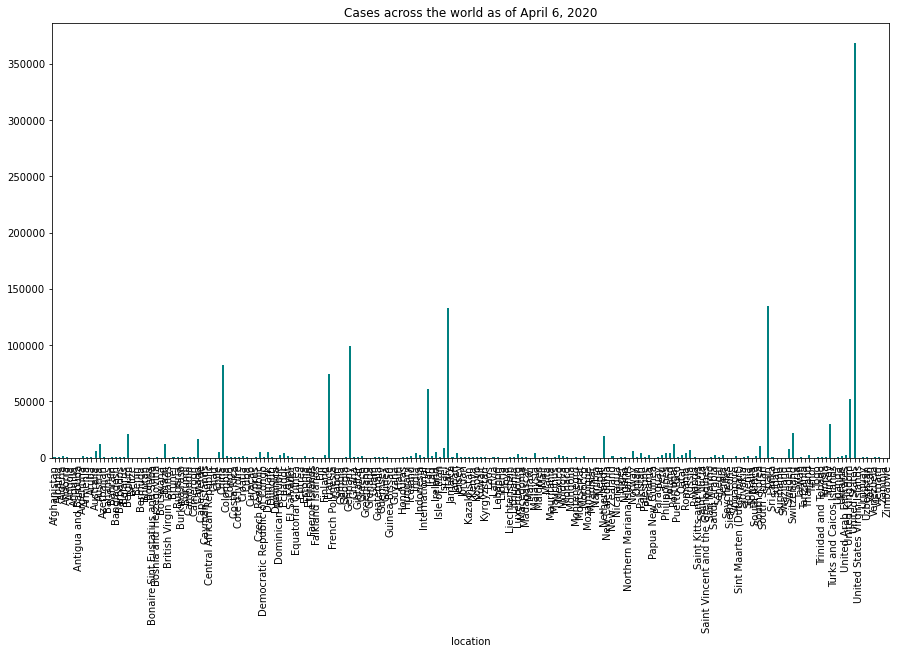

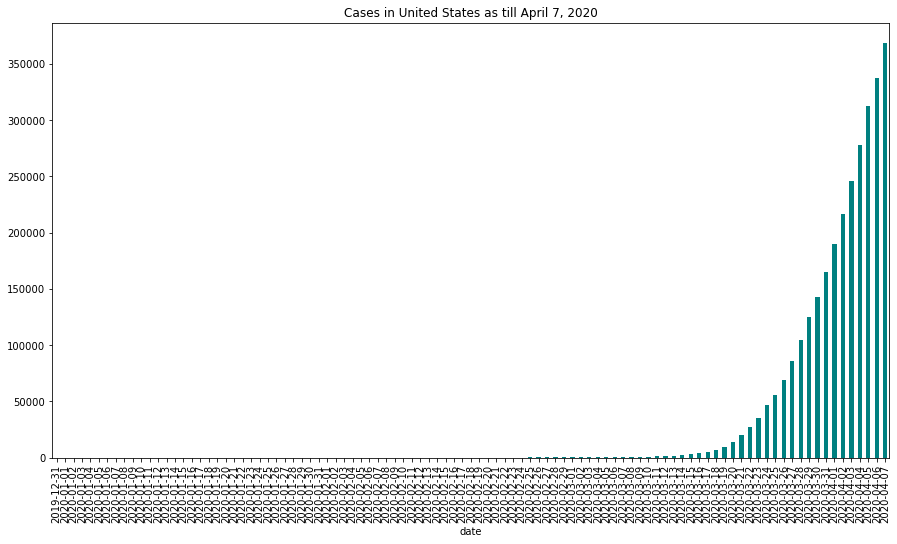

In [1047]:
World = pd.read_csv("full_data(14).csv")
World = World[World.location != 'World']

plt.figure(figsize=(15,8))
plt.title('Cases across the world as of April 6, 2020') # Title
World.groupby("location")['total_cases'].max().plot(kind='bar', color='teal')

USA = World.loc[World['location'] == 'United States']
print(USA)

print(World[World['total_cases']==World['total_cases'].max()])

plt.figure(figsize=(15,8))
plt.title('Cases in United States as till April 7, 2020') # Title
USA.groupby("date")['total_cases'].max().plot(kind='bar', color='teal')

World.corr().style.background_gradient(cmap='magma')


## USA state analyze 
Lets check the data of COVID-19 cases in the USA.

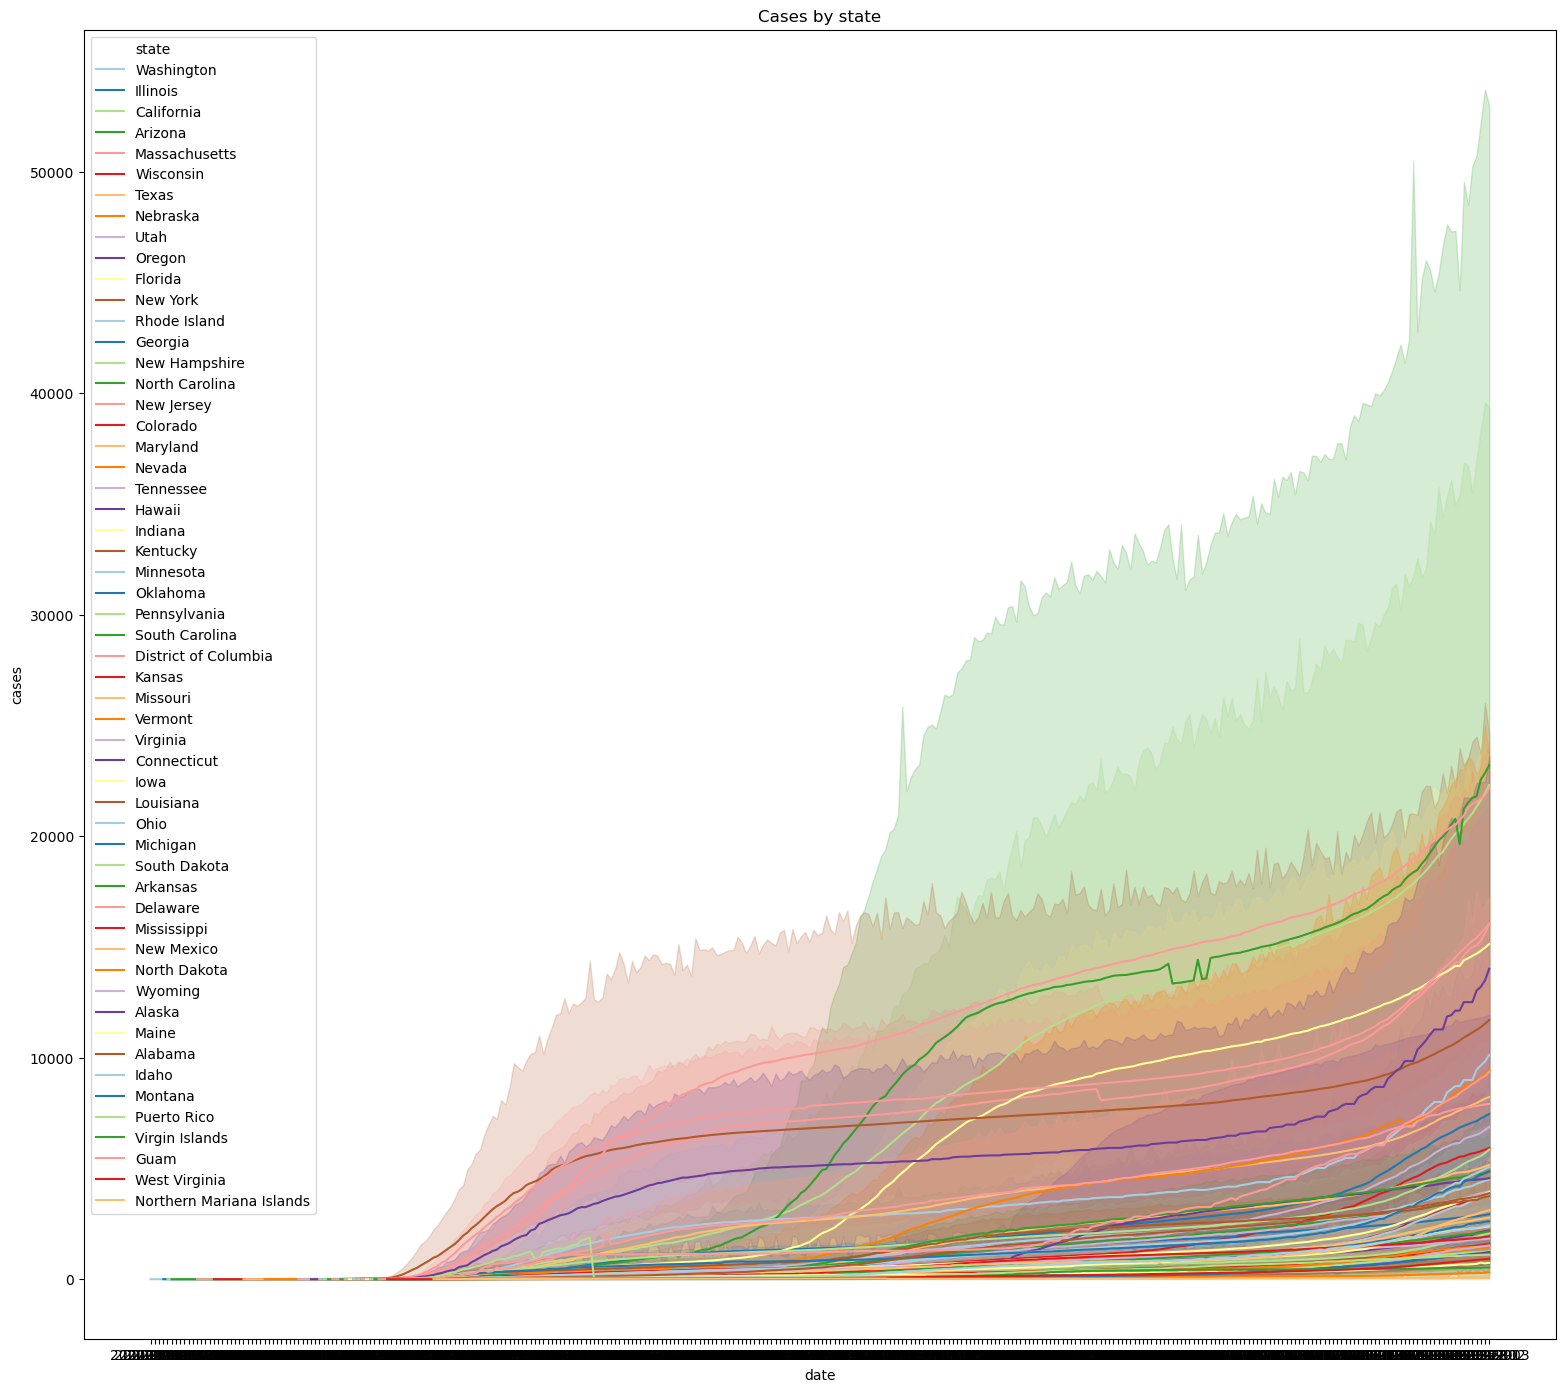

In [711]:
df = pd.read_csv('us-counties.csv')

USA=df.drop(['fips','county'], axis = 1) 
plt.figure(figsize=(19,17))
plt.title('Cases by state') # Title
sns.lineplot(x="date", y="cases", hue="state",data=USA, palette="Paired")
plt.show()

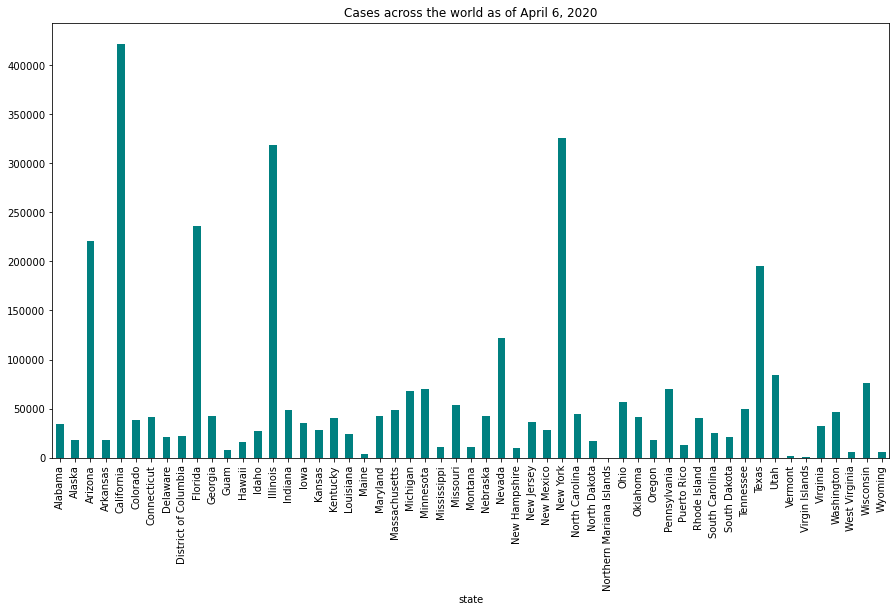

In [40]:

plt.figure(figsize=(15,8))
plt.title('Cases in USA by states in 2020') # Title
USA.groupby("state")['cases'].max().plot(kind='bar', color='teal')


### USA vulnerability

In [231]:
vuln = pd.read_csv("cdcs-social-vulnerability-index-svi-2016-overall-svi-county-level.csv")
vuln=vuln[['state', 'e_totpop', 'e_pov', 'e_unemp',
           'e_age65','e_age17', 'e_disabl', 'e_minrty']]
vuln= vuln.rename(columns={'e_totpop': 'est population','e_pov': 'est. poverty', 'e_unemp': 'unemployed',
                           'e_age65': 'over 65','e_age17': 'under 17',
                           'e_disabl':'disabled', 'e_minrty': 'minority'})
vuln["state"]=vuln["state"].str.lower()
vuln["state"]=vuln["state"].str.title()
vuln

,state,est population,est. poverty,unemployed,over 65,under 17,disabled,minority
0,Alabama,55049,6697,1437,7695,13853,10009,13386
1,Alabama,57704,9441,1367,9921,13601,8538,7122
2,Alabama,34018,6805,1136,6255,7283,5960,14715
3,Alabama,50991,8219,1410,8048,12122,8942,14598
4,Alabama,54377,8910,1795,10034,11735,10561,11499
...,...,...,...,...,...,...,...,...
3137,Georgia,5791,1666,212,882,842,927,4237
3138,Mississippi,28268,7412,1499,3856,7539,5911,14115
3139,South Carolina,9589,2519,597,1608,1911,2192,7413
3140,Texas,14335,4857,754,1681,4847,2314,13494


In [828]:
def drop_vuln(df):
    for i in ['est population','est. poverty', 'unemployed',
                           'over 65', 'under 17',
                           'disabled', 'minority']:
        if i in df:
                df = df.drop([i], axis=1)
    return df
    

In [232]:
vuln.describe()

,est population,est. poverty,unemployed,over 65,under 17,disabled,minority
count,3.142000e+03,3.142000e+03,3142.000000,3.142000e+03,3.142000e+03,3142.000000,3.142000e+03
mean,1.013871e+05,1.493705e+04,3757.407066,1.469785e+04,2.342853e+04,12499.213558,3.857272e+04
std,3.252017e+05,5.349297e+04,13873.771604,4.194183e+04,7.642368e+04,33932.484461,2.021231e+05
min,7.600000e+01,9.000000e+00,0.000000,1.900000e+01,1.000000e+00,13.000000,0.000000e+00
25%,1.099650e+04,1.676250e+03,315.000000,2.010250e+03,2.463750e+03,1764.500000,1.141250e+03
50%,2.573750e+04,4.218000e+03,845.000000,4.399500e+03,5.856000e+03,4181.000000,4.173500e+03
75%,6.758325e+04,1.014650e+04,2346.250000,1.115175e+04,1.518025e+04,10077.250000,1.446775e+04
max,1.005716e+07,1.764081e+06,460565.000000,1.227202e+06,2.296785e+06,984716.000000,7.369368e+06


In [233]:
vuln.corr().style.background_gradient(cmap='viridis')

,est population,est. poverty,unemployed,over 65,under 17,disabled,minority
est population,1.000000,0.968482,0.983080,0.982526,0.994671,0.985730,0.959613
est. poverty,0.968482,1.000000,0.980061,0.940907,0.967961,0.971761,0.969846
unemployed,0.983080,0.980061,1.000000,0.965673,0.975252,0.979004,0.968293
over 65,0.982526,0.940907,0.965673,1.000000,0.965708,0.981883,0.921024
under 17,0.994671,0.967961,0.975252,0.965708,1.000000,0.978934,0.958414
disabled,0.985730,0.971761,0.979004,0.981883,0.978934,1.000000,0.934483
minority,0.959613,0.969846,0.968293,0.921024,0.958414,0.934483,1.000000


### USA census

In [266]:
census = pd.read_csv("500-cities-census-tract-level-data-gis-friendly-format-2019-release.csv")
census

,stateabbr,placename,placefips,tractfips,place_tractid,population2010,access2_crudeprev,access2_crude95ci,arthritis_crudeprev,arthritis_crude95ci,...,paptest_crude95ci,phlth_crudeprev,phlth_crude95ci,sleep_crudeprev,sleep_crude95ci,stroke_crudeprev,stroke_crude95ci,teethlost_crudeprev,teethlost_crude95ci,geolocation
0,AL,Birmingham,107000,1073000100,0107000-01073000100,3042,24.4,"(21.2, 27.8)",31.2,"(30.1, 32.2)",...,"(83.4, 86.6)",20.5,"(18.9, 22.2)",45.5,"(44.3, 46.5)",5.5,"( 5.0, 5.9)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)"
1,AL,Birmingham,107000,1073000300,0107000-01073000300,2735,30.4,"(27.1, 33.7)",30.5,"(29.3, 31.7)",...,"(81.9, 85.6)",22.2,"(20.4, 24.0)",44.5,"(43.2, 45.7)",6.1,"( 5.5, 6.8)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)"
2,AL,Birmingham,107000,1073000400,0107000-01073000400,3338,24.7,"(21.1, 28.5)",31.5,"(30.2, 32.9)",...,"(82.3, 86.8)",19.4,"(17.5, 21.4)",45.7,"(44.2, 47.0)",5.6,"( 5.0, 6.2)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)"
3,AL,Birmingham,107000,1073000500,0107000-01073000500,2864,25.2,"(21.6, 29.0)",35.0,"(33.5, 36.4)",...,"(82.1, 86.5)",21.7,"(19.7, 23.9)",46.1,"(44.5, 47.4)",7.3,"( 6.5, 8.2)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)"
4,AL,Birmingham,107000,1073000700,0107000-01073000700,2577,29.0,"(24.5, 33.8)",36.3,"(34.9, 37.7)",...,"(82.2, 87.1)",25.5,"(23.1, 28.0)",48.3,"(46.6, 49.7)",9.0,"( 8.1, 10.0)",43.2,"(33.2, 53.2)","(33.55254061390, -86.8016893706)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27205,WY,Cheyenne,5613900,56021001401,5613900-56021001401,3961,14.7,"(12.4, 17.3)",22.9,"(21.8, 24.1)",...,"(76.7, 82.5)",10.4,"( 9.3, 11.6)",32.9,"(31.4, 34.3)",2.5,"( 2.3, 2.8)",12.8,"( 8.8, 18.1)","(41.15850561440, -104.777631834)"
27206,WY,Cheyenne,5613900,56021001402,5613900-56021001402,1913,13.6,"(11.4, 16.2)",27.3,"(25.5, 29.0)",...,"(76.6, 82.4)",10.5,"( 9.0, 12.3)",30.2,"(28.6, 31.7)",3.3,"( 2.7, 4.1)",12.9,"( 6.6, 23.9)","(41.17177648050, -104.788212134)"
27207,WY,Cheyenne,5613900,56021001501,5613900-56021001501,3312,14.5,"(12.9, 16.1)",22.0,"(21.2, 22.8)",...,"(78.3, 82.1)",9.6,"( 8.9, 10.4)",32.9,"(31.9, 33.9)",2.3,"( 2.2, 2.5)",11.9,"( 8.5, 15.9)","(41.16037417080, -104.756560525)"
27208,WY,Cheyenne,5613900,56021001502,5613900-56021001502,4518,16.6,"(14.3, 18.9)",25.2,"(24.1, 26.3)",...,"(76.4, 81.5)",12.0,"(10.8, 13.3)",34.8,"(33.3, 36.1)",3.2,"( 2.8, 3.6)",19.7,"(13.1, 27.1)","(41.15063392830, -104.755675636)"


In [267]:
census=census[['stateabbr','placename', 'geolocation', 'bphigh_crudeprev',
               'stroke_crudeprev', 'obesity_crudeprev', 'diabetes_crudeprev','arthritis_crudeprev',
               'cancer_crudeprev', 'casthma_crudeprev', 'copd_crudeprev', 'csmoking_crudeprev', 
               'highchol_crudeprev', 'kidney_crudeprev']]
census

,stateabbr,placename,geolocation,bphigh_crudeprev,stroke_crudeprev,obesity_crudeprev,diabetes_crudeprev,arthritis_crudeprev,cancer_crudeprev,casthma_crudeprev,copd_crudeprev,csmoking_crudeprev,highchol_crudeprev,kidney_crudeprev
0,AL,Birmingham,"(33.57943283260, -86.7228323926)",47.7,5.5,46.4,17.4,31.2,5.3,13.4,11.3,27.9,35.3,4.3
1,AL,Birmingham,"(33.54282086860, -86.7524339780)",48.2,6.1,47.8,19.8,30.5,4.7,12.5,11.9,29.3,36.8,4.6
2,AL,Birmingham,"(33.56324496330, -86.7640474064)",49.1,5.6,45.7,18.4,31.5,5.3,13.3,10.5,25.9,35.6,4.2
3,AL,Birmingham,"(33.54424045940, -86.7749130719)",54.1,7.3,48.0,22.4,35.0,6.0,13.6,12.3,26.3,38.4,5.3
4,AL,Birmingham,"(33.55254061390, -86.8016893706)",56.5,9.0,52.7,25.0,36.3,5.9,14.7,14.8,30.9,39.0,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27205,WY,Cheyenne,"(41.15850561440, -104.777631834)",29.0,2.5,28.9,8.1,22.9,6.3,9.5,5.8,18.0,30.5,2.5
27206,WY,Cheyenne,"(41.17177648050, -104.788212134)",33.1,3.3,25.6,8.8,27.3,9.0,9.2,6.2,14.2,32.5,3.1
27207,WY,Cheyenne,"(41.16037417080, -104.756560525)",27.8,2.3,27.7,7.4,22.0,6.4,9.4,5.3,17.4,29.1,2.3
27208,WY,Cheyenne,"(41.15063392830, -104.755675636)",31.9,3.2,30.9,9.4,25.2,6.9,9.9,7.0,19.8,31.9,3.0


In [847]:
def drop_census(df):
    for i in ['stateabbr','placename', 'geolocation', 'bphigh_crudeprev',
               'stroke_crudeprev', 'obesity_crudeprev', 'diabetes_crudeprev','arthritis_crudeprev',
               'cancer_crudeprev', 'casthma_crudeprev', 'copd_crudeprev', 'csmoking_crudeprev', 
               'highchol_crudeprev', 'kidney_crudeprev']:
            if i in df:
                    df = df.drop([i], axis=1)
    return df

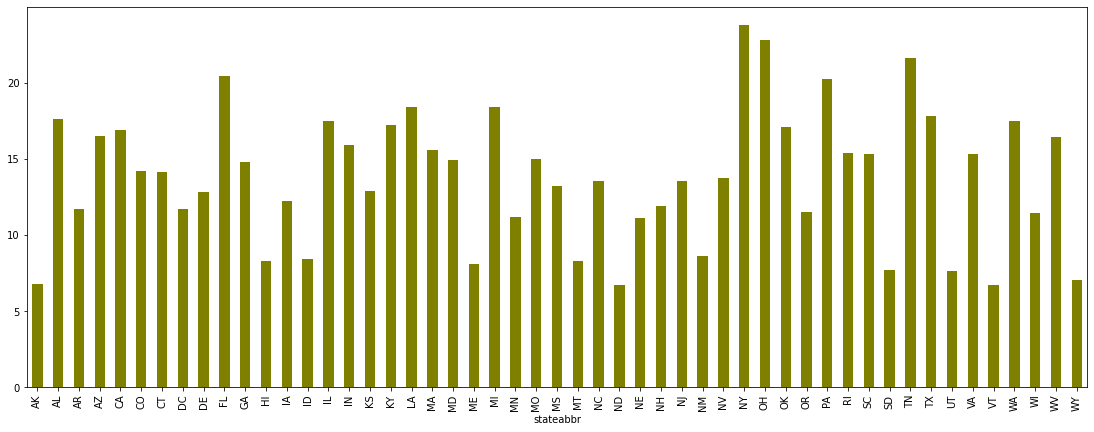

In [268]:
plt.figure(figsize=(19,7)) # Figure size
census.groupby("stateabbr")['copd_crudeprev'].max().plot(kind='bar', color='olive')

In [269]:
def abbr_to_state(df):
    df=df.replace(to_replace =("ND","OK", "UT", 'AK', 'SD','AL','AR'),
                     value =("North Dakota", "Oklahoma", 'Utah', "Alaska", "South Dakota", "Alabama", "Arkansas"))
    df=df.replace(to_replace =("NC","OR", "NV", 'AZ', 'SC','CA','CO'),
                     value =("North Carolina", "Oregon", 'Nevada', "Arizona", "South Carolina", "California", "Colorado"))
    df=df.replace(to_replace =("MN","WY", "WV", 'WI', 'WA','VT','VA'),
                     value =("Minnesota", "Wyoming", 'West Virginia', "Wisconsin", "Washington", "Vermont", "Virginia"))
    df=df.replace(to_replace =("FL","NE", "MT", 'HI', 'LA','NM','GA','KS'),
                     value =("Florida", "Nebraska", 'Montana', "Hawaii", "Louisiana", "New Mexico", "Georgia", "Kansas"))
    df=df.replace(to_replace =("NY","NJ", "OH", 'RI', 'PA','TX','ID','KY'),
                     value =("New York", "New Jersey", 'Ohio', "Rhode Island", "Pennsylvania", "Texas", "Idaho", "Kentucky"))
    df=df.replace(to_replace =("CT","DC", "DE", 'IA', 'IL','IN','MD','MA'),
                     value =("Connecticut", "District of Columbia", 'Delaware', "Iowa", "Illinios", "Indiana", "Maryland", "Massachusetts"))
    df=df.replace(to_replace =("ME","MI", "MO", 'MS', 'TN'),
                     value =("Maine", "Michigan", 'Missouri', "Mississippi", "Tennessee"))
    return df
census = abbr_to_state(census)
census

,stateabbr,placename,geolocation,bphigh_crudeprev,stroke_crudeprev,obesity_crudeprev,diabetes_crudeprev,arthritis_crudeprev,cancer_crudeprev,casthma_crudeprev,copd_crudeprev,csmoking_crudeprev,highchol_crudeprev,kidney_crudeprev
0,Alabama,Birmingham,"(33.57943283260, -86.7228323926)",47.7,5.5,46.4,17.4,31.2,5.3,13.4,11.3,27.9,35.3,4.3
1,Alabama,Birmingham,"(33.54282086860, -86.7524339780)",48.2,6.1,47.8,19.8,30.5,4.7,12.5,11.9,29.3,36.8,4.6
2,Alabama,Birmingham,"(33.56324496330, -86.7640474064)",49.1,5.6,45.7,18.4,31.5,5.3,13.3,10.5,25.9,35.6,4.2
3,Alabama,Birmingham,"(33.54424045940, -86.7749130719)",54.1,7.3,48.0,22.4,35.0,6.0,13.6,12.3,26.3,38.4,5.3
4,Alabama,Birmingham,"(33.55254061390, -86.8016893706)",56.5,9.0,52.7,25.0,36.3,5.9,14.7,14.8,30.9,39.0,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27205,Wyoming,Cheyenne,"(41.15850561440, -104.777631834)",29.0,2.5,28.9,8.1,22.9,6.3,9.5,5.8,18.0,30.5,2.5
27206,Wyoming,Cheyenne,"(41.17177648050, -104.788212134)",33.1,3.3,25.6,8.8,27.3,9.0,9.2,6.2,14.2,32.5,3.1
27207,Wyoming,Cheyenne,"(41.16037417080, -104.756560525)",27.8,2.3,27.7,7.4,22.0,6.4,9.4,5.3,17.4,29.1,2.3
27208,Wyoming,Cheyenne,"(41.15063392830, -104.755675636)",31.9,3.2,30.9,9.4,25.2,6.9,9.9,7.0,19.8,31.9,3.0


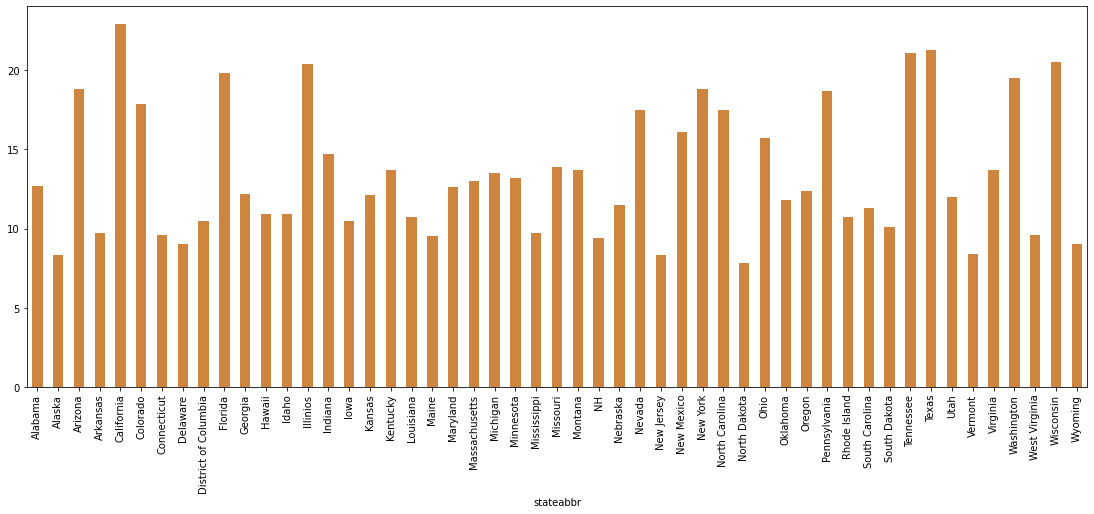

In [271]:
plt.figure(figsize=(19,7)) 
census.groupby("stateabbr")['cancer_crudeprev'].max().plot(kind='bar', color='peru')

In [272]:
census=census.drop(['placename', 'geolocation'], axis = 1) 
census = census.rename(columns={'stateabbr': 'state'})
census = census.rename(columns={'bphigh_crudeprev': 'high bp prev', 'stroke_crudeprev': 'stroke prev'})
census=census.rename(columns={'diabetes_crudeprev': 'diabetes prev', 'cancer_crudeprev': 'cancer prev', 'arthritis_crudeprev': 'arthritis prev'})
census=census.rename(columns={'casthma_crudeprev': 'asthma prev', 'copd_crudeprev': 'copd prev', 'csmoking_crudeprev': 'smoking prev'})
census=census.rename(columns={'highchol_crudeprev': 'highChol prev', 'kidney_crudeprev': 'kidney prev'})
census

,state,high bp prev,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
0,Alabama,47.7,5.5,46.4,17.4,31.2,5.3,13.4,11.3,27.9,35.3,4.3
1,Alabama,48.2,6.1,47.8,19.8,30.5,4.7,12.5,11.9,29.3,36.8,4.6
2,Alabama,49.1,5.6,45.7,18.4,31.5,5.3,13.3,10.5,25.9,35.6,4.2
3,Alabama,54.1,7.3,48.0,22.4,35.0,6.0,13.6,12.3,26.3,38.4,5.3
4,Alabama,56.5,9.0,52.7,25.0,36.3,5.9,14.7,14.8,30.9,39.0,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...
27205,Wyoming,29.0,2.5,28.9,8.1,22.9,6.3,9.5,5.8,18.0,30.5,2.5
27206,Wyoming,33.1,3.3,25.6,8.8,27.3,9.0,9.2,6.2,14.2,32.5,3.1
27207,Wyoming,27.8,2.3,27.7,7.4,22.0,6.4,9.4,5.3,17.4,29.1,2.3
27208,Wyoming,31.9,3.2,30.9,9.4,25.2,6.9,9.9,7.0,19.8,31.9,3.0


In [274]:
census.describe()

,high bp prev,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
count,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000
mean,30.653208,3.211466,30.472922,10.811062,21.430129,5.648912,9.741352,6.309960,17.973047,31.364296,3.099666
std,8.260472,1.449541,8.180685,4.269441,5.995361,1.803257,1.710538,2.545739,6.114202,4.887047,0.960904
min,5.300000,0.300000,9.600000,0.800000,2.400000,0.700000,5.600000,1.000000,2.000000,6.900000,0.700000
25%,25.300000,2.300000,24.500000,7.900000,17.300000,4.500000,8.500000,4.500000,13.400000,28.800000,2.500000
50%,29.500000,2.900000,29.500000,10.000000,21.000000,5.500000,9.400000,5.800000,17.100000,31.700000,2.900000
75%,34.900000,3.800000,35.600000,12.900000,25.100000,6.600000,10.700000,7.600000,21.700000,34.400000,3.600000
max,70.300000,19.500000,58.600000,39.500000,58.400000,22.900000,17.800000,23.800000,50.300000,55.400000,12.300000


In [273]:
census.corr().style.background_gradient(cmap='cividis')

,high bp prev,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
high bp prev,1.000000,0.929248,0.745852,0.899804,0.859888,0.414397,0.591753,0.852756,0.606235,0.767132,0.885130
stroke prev,0.929248,1.000000,0.740103,0.935041,0.784451,0.293622,0.668484,0.901332,0.684947,0.668650,0.962226
obesity_crudeprev,0.745852,0.740103,1.000000,0.775815,0.523238,-0.130160,0.718525,0.752574,0.851386,0.359479,0.706349
diabetes prev,0.899804,0.935041,0.775815,1.000000,0.676042,0.153268,0.579688,0.816148,0.665321,0.673546,0.944776
arthritis prev,0.859888,0.784451,0.523238,0.676042,1.000000,0.715015,0.480158,0.806639,0.437621,0.825677,0.746733
cancer prev,0.414397,0.293622,-0.130160,0.153268,0.715015,1.000000,-0.115426,0.290831,-0.233211,0.704001,0.302181
asthma prev,0.591753,0.668484,0.718525,0.579688,0.480158,-0.115426,1.000000,0.688672,0.777186,0.157677,0.607427
copd prev,0.852756,0.901332,0.752574,0.816148,0.806639,0.290831,0.688672,1.000000,0.803823,0.651424,0.861767
smoking prev,0.606235,0.684947,0.851386,0.665321,0.437621,-0.233211,0.777186,0.803823,1.000000,0.247406,0.630046
highChol prev,0.767132,0.668650,0.359479,0.673546,0.825677,0.704001,0.157677,0.651424,0.247406,1.000000,0.706735


### USA chronic disease dataset

In [101]:
chronic = pd.read_csv("u-s-chronic-disease-indicators-cdi.csv")
chronic

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,response,datavalueunit,datavaluetype,...,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2,stratificationcategoryid3,stratificationid3
0,2010,2014,WA,Washington,Death Certificate,Cancer,"Cancer of the colon and rectum (colorectal), m...",NaN,"per 100,000",Average Annual Age-adjusted Rate,...,53,CAN,CAN7_2,AVGANNAGEADJRATE,GENDER,GENM,NaN,NaN,NaN,NaN
1,2009,2013,OR,Oregon,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence",NaN,"per 100,000",Average Annual Age-adjusted Rate,...,41,CAN,CAN4_1,AVGANNAGEADJRATE,RACE,WHT,NaN,NaN,NaN,NaN
2,2009,2013,FL,Florida,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",NaN,"per 100,000",Average Annual Crude Rate,...,12,CAN,CAN10_2,AVGANNCRDRATE,RACE,AIAO,NaN,NaN,NaN,NaN
3,2010,2014,MI,Michigan,Statewide central cancer registries,Cancer,"Cancer of the lung and bronchus, incidence",NaN,NaN,Average Annual Number,...,26,CAN,CAN8_1,AVGANNNMBR,RACE,WHT,NaN,NaN,NaN,NaN
4,2010,2014,KY,Kentucky,Statewide central cancer registries,Cancer,"Cancer of the lung and bronchus, incidence",NaN,"per 100,000",Average Annual Crude Rate,...,21,CAN,CAN8_1,AVGANNCRDRATE,RACE,AIAO,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814932,2009,2013,NM,New Mexico,Death Certificate,Cancer,"Invasive cancer (all sites combined), mortality",NaN,NaN,Average Annual Number,...,35,CAN,CAN4_2,AVGANNNMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
814933,2009,2013,AL,Alabama,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,"per 100,000",Average Annual Age-adjusted Rate,...,1,CAN,CAN10_1,AVGANNAGEADJRATE,RACE,WHT,NaN,NaN,NaN,NaN
814934,2010,2014,OH,Ohio,Death Certificate,Cancer,"Cancer of the lung and bronchus, mortality",NaN,"per 100,000",Average Annual Age-adjusted Rate,...,39,CAN,CAN8_2,AVGANNAGEADJRATE,OVERALL,OVR,NaN,NaN,NaN,NaN
814935,2009,2013,SC,South Carolina,Death Certificate,Cancer,"Invasive cancer (all sites combined), mortality",NaN,"per 100,000",Average Annual Age-adjusted Rate,...,45,CAN,CAN4_2,AVGANNAGEADJRATE,RACE,HIS,NaN,NaN,NaN,NaN


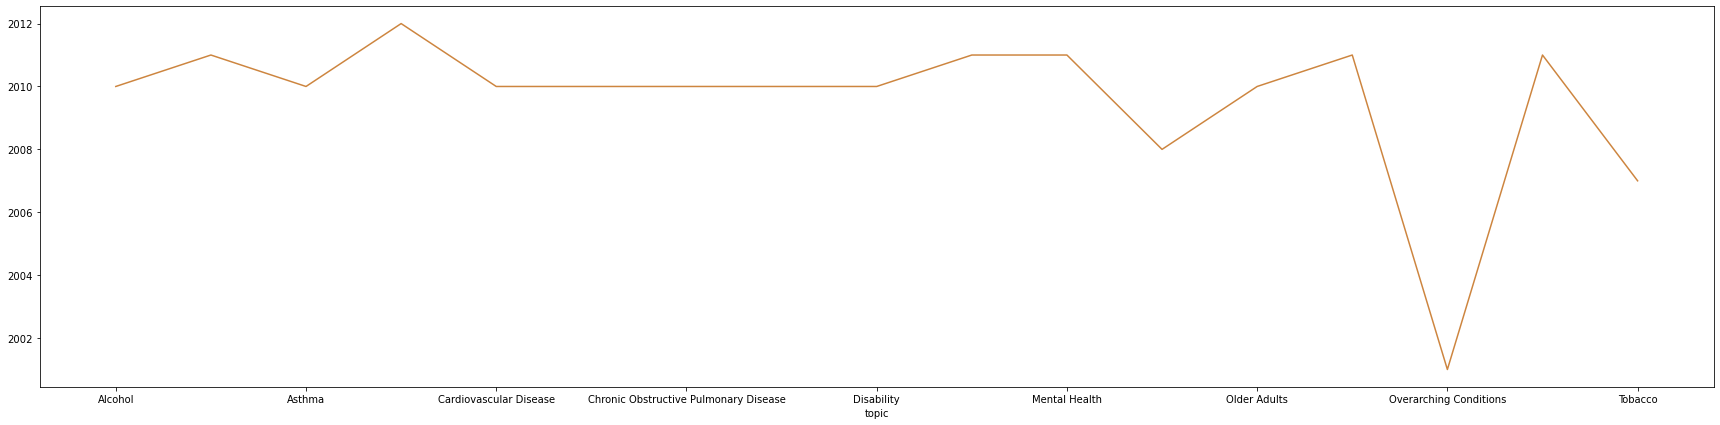

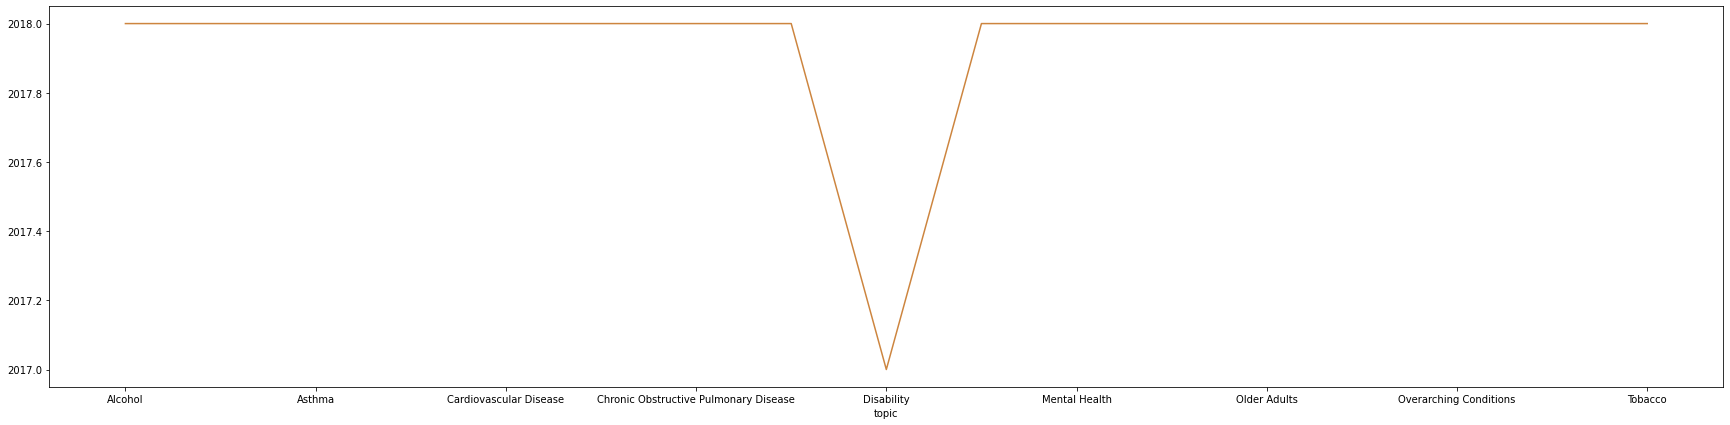

In [112]:
plt.figure(figsize=(30,7))
chronic.groupby("topic")['yearend'].min().plot(kind='line', color='peru')

plt.figure(figsize=(30,7))
chronic.groupby("topic")['yearend'].max().plot(kind='line', color='peru')

In [114]:
#replacing NaNs with 0
chronic=chronic[['locationdesc','topic','question','datavalue']]
chronic=chronic.fillna(0)
chronic

,locationdesc,topic,question,datavalue
0,Washington,Cancer,"Cancer of the colon and rectum (colorectal), m...",15.2
1,Oregon,Cancer,"Invasive cancer (all sites combined), incidence",513.5
2,Florida,Cancer,"Cancer of the oral cavity and pharynx, mortality",0.0
3,Michigan,Cancer,"Cancer of the lung and bronchus, incidence",6726.0
4,Kentucky,Cancer,"Cancer of the lung and bronchus, incidence",0.0
...,...,...,...,...
814932,New Mexico,Cancer,"Invasive cancer (all sites combined), mortality",3366.0
814933,Alabama,Cancer,"Invasive cancer of the oral cavity or pharynx,...",14.3
814934,Ohio,Cancer,"Cancer of the lung and bronchus, mortality",52.8
814935,South Carolina,Cancer,"Invasive cancer (all sites combined), mortality",82.6


In [116]:
chronic = chronic.rename(columns={'locationdesc': 'state','datavalue': 'rate of illness','topic': 'chronic illness','question': 'specific illness'})
chronic


,state,chronic illness,specific illness,rate of illness
0,Washington,Cancer,"Cancer of the colon and rectum (colorectal), m...",15.2
1,Oregon,Cancer,"Invasive cancer (all sites combined), incidence",513.5
2,Florida,Cancer,"Cancer of the oral cavity and pharynx, mortality",0.0
3,Michigan,Cancer,"Cancer of the lung and bronchus, incidence",6726.0
4,Kentucky,Cancer,"Cancer of the lung and bronchus, incidence",0.0
...,...,...,...,...
814932,New Mexico,Cancer,"Invasive cancer (all sites combined), mortality",3366.0
814933,Alabama,Cancer,"Invasive cancer of the oral cavity or pharynx,...",14.3
814934,Ohio,Cancer,"Cancer of the lung and bronchus, mortality",52.8
814935,South Carolina,Cancer,"Invasive cancer (all sites combined), mortality",82.6


In [715]:
def drop_chronic(df):
    return df.drop(['state', 'chronic illness', 'specific illness','rate of illness'], axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

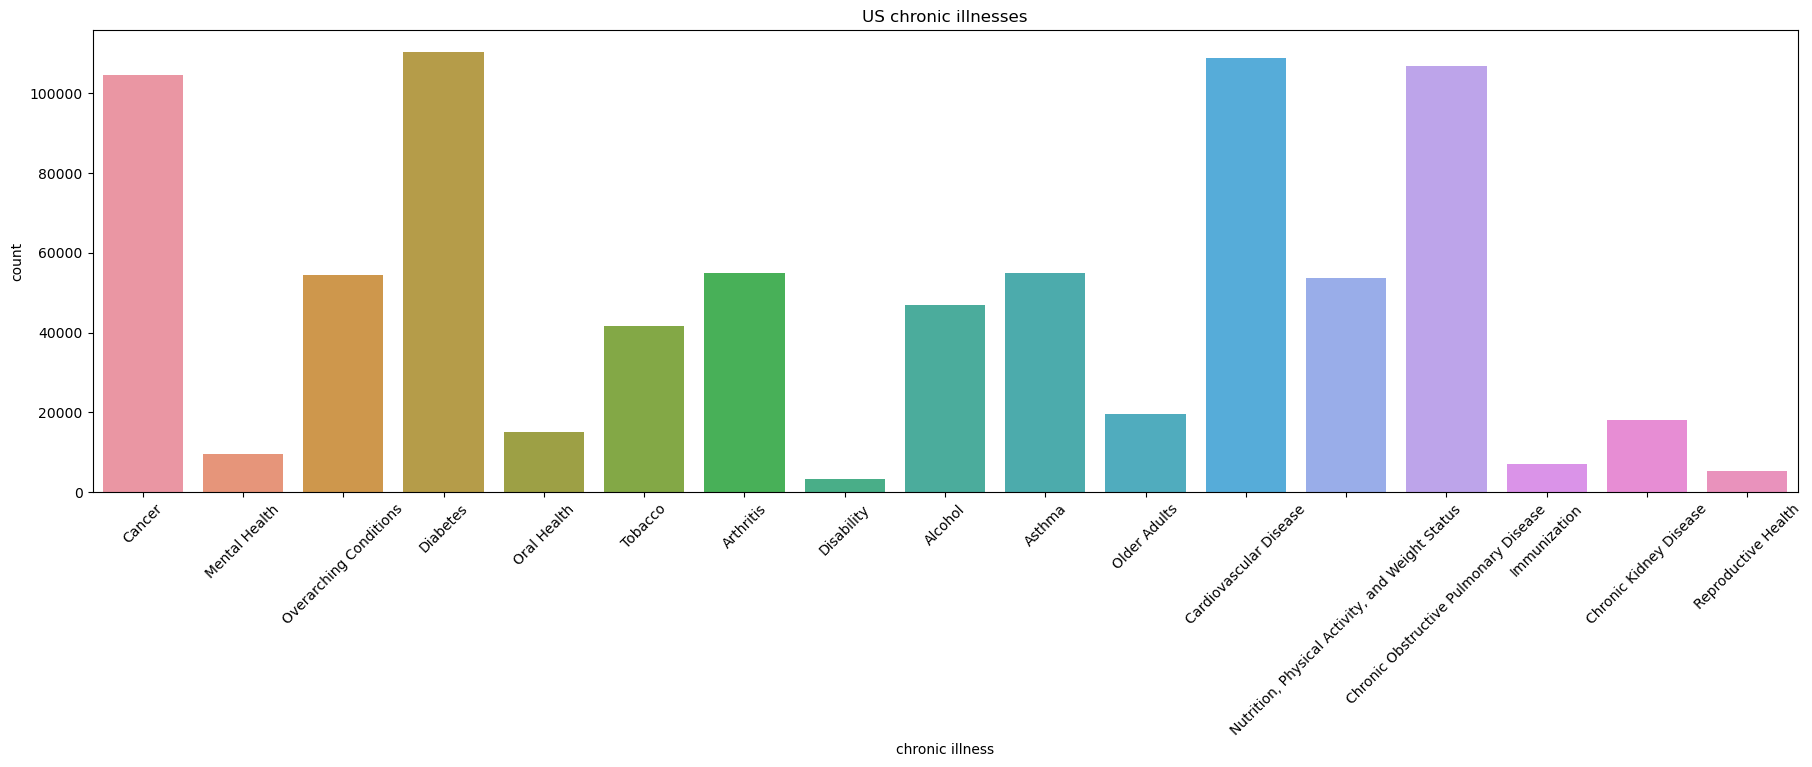

In [718]:
plt.figure(figsize=(22,6)) 
plt.title('US chronic illnesses') 
sns.countplot(chronic['chronic illness'])
plt.xticks(rotation=45)

In [118]:
chronic.describe()

,rate of illness
count,8.149370e+05
mean,6.474176e+02
std,1.577938e+04
min,0.000000e+00
25%,0.000000e+00
50%,1.890000e+01
75%,5.860000e+01
max,2.892731e+06


### USA health ranking dataset

In [120]:
rank = pd.read_csv("us-county-health-rankings-2020.csv")
rank

,fips,state,county,num_deaths,years_of_potential_life_lost_rate,95percent_ci_low,95percent_ci_high,quartile,ypll_rate_aian,ypll_rate_aian_95percent_ci_low,...,percent_hispanic,num_non_hispanic_white,percent_non_hispanic_white,num_not_proficient_in_english,percent_not_proficient_in_english,95percent_ci_low_39,95percent_ci_high_39,percent_female,num_rural,percent_rural
0,1000,Alabama,NaN,81791.0,9942.794666,9840.535949,10045.053384,NaN,NaN,NaN,...,4.443264,3197324,65.413428,48517,1.061048,1.006759,1.115337,51.633032,1957932.0,40.963183
1,1001,Alabama,Autauga,791.0,8128.591190,7283.340731,8973.841649,1.0,NaN,NaN,...,2.965774,41316,74.308016,426,0.820225,0.347891,1.292558,51.448715,22921.0,42.002162
2,1003,Alabama,Baldwin,2967.0,7354.122530,6918.554269,7789.690790,1.0,NaN,NaN,...,4.646779,181201,83.111337,1068,0.543517,0.347271,0.739763,51.538377,77060.0,42.279099
3,1005,Alabama,Barbour,472.0,10253.573403,8782.217281,11724.929524,2.0,NaN,NaN,...,4.276355,11356,45.641252,398,1.631683,0.824903,2.438462,47.216752,18613.0,67.789635
4,1007,Alabama,Bibb,471.0,11977.539484,10344.064842,13611.014126,3.0,NaN,NaN,...,2.625000,16708,74.589286,57,0.268210,0.000000,0.807504,46.781250,15663.0,68.352607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater,532.0,7831.827655,6915.944384,8747.710925,4.0,NaN,NaN,...,16.083250,34145,79.312908,669,1.633221,0.993813,2.272629,48.544749,4782.0,10.916313
3189,56039,Wyoming,Teton,109.0,2730.603992,1991.644111,3469.563872,1.0,NaN,NaN,...,14.878038,18812,81.504268,945,4.314477,2.787340,5.841615,48.403449,9887.0,46.430920
3190,56041,Wyoming,Uinta,256.0,7330.683549,6011.148684,8650.218415,3.0,NaN,NaN,...,9.236908,17741,87.398394,133,0.696080,0.000000,1.429709,49.332479,9101.0,43.095937
3191,56043,Wyoming,Washakie,110.0,6586.049959,4500.924119,8671.175799,2.0,NaN,NaN,...,14.051997,6498,82.409639,25,0.324886,0.000000,1.376766,49.422955,3068.0,35.954529


In [121]:
rank=rank[['state','num_deaths', 'percent_female','percent_excessive_drinking', 
           'num_uninsured','percent_vaccinated','percent_black','percent_american_indian_alaska_native',
           'percent_asian', 'percent_native_hawaiian_other_pacific_islander', 'percent_hispanic', 
           'percent_non_hispanic_white']]
rank.head()

,state,num_deaths,percent_female,percent_excessive_drinking,num_uninsured,percent_vaccinated,percent_black,percent_american_indian_alaska_native,percent_asian,percent_native_hawaiian_other_pacific_islander,percent_hispanic,percent_non_hispanic_white
0,Alabama,81791.0,51.633032,13.903515,438049.0,41.0,26.497733,0.703271,1.496909,0.106529,4.443264,65.413428
1,Alabama,791.0,51.448715,15.026031,4093.0,41.0,19.343177,0.480207,1.224798,0.111509,2.965774,74.308016
2,Alabama,2967.0,51.538377,17.958310,19119.0,44.0,8.783976,0.772399,1.150343,0.066966,4.646779,83.111337
3,Alabama,472.0,47.216752,12.844016,2136.0,37.0,48.032635,0.659137,0.454162,0.184880,4.276355,45.641252
4,Alabama,471.0,46.781250,15.570042,1727.0,38.0,21.120536,0.437500,0.236607,0.116071,2.625000,74.589286


In [811]:
def drop_rank(df):
    for i in ['state','num_deaths', 'percent_female','percent_excessive_drinking', 
           'num_uninsured','percent_vaccinated','percent_black','percent_american_indian_alaska_native',
           'percent_asian', 'percent_native_hawaiian_other_pacific_islander', 'percent_hispanic', 
           'percent_non_hispanic_white']:
        if i in df:
            df = df.drop([i], axis=1)
    return df

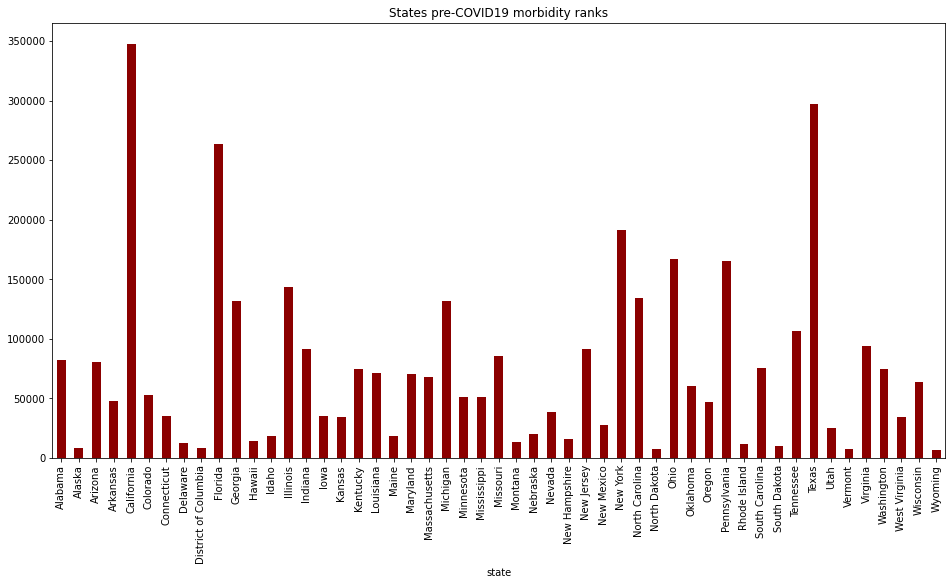

In [122]:
plt.figure(figsize=(16,8)) # Figure size
plt.title('States pre-COVID19 morbidity ranks') # Title
rank.groupby("state")['num_deaths'].max().plot(kind='bar', color='darkred')

In [123]:
rank.corr().style.background_gradient(cmap='inferno')

,num_deaths,percent_female,percent_excessive_drinking,num_uninsured,percent_vaccinated,percent_black,percent_american_indian_alaska_native,percent_asian,percent_native_hawaiian_other_pacific_islander,percent_hispanic,percent_non_hispanic_white
num_deaths,1.000000,0.068029,0.050155,0.908967,0.064967,0.045752,-0.024492,0.210361,0.032503,0.092489,-0.118771
percent_female,0.068029,1.000000,-0.181556,0.050904,0.197982,0.145850,-0.076683,0.006429,0.008550,-0.152432,0.024335
percent_excessive_drinking,0.050155,-0.181556,1.000000,0.031662,0.219661,-0.370705,0.010434,0.195179,0.012502,0.006310,0.220927
num_uninsured,0.908967,0.050904,0.031662,1.000000,0.047536,0.043366,-0.016370,0.171464,0.025633,0.116814,-0.130508
percent_vaccinated,0.064967,0.197982,0.219661,0.047536,1.000000,-0.016014,-0.195394,0.197756,-0.003264,-0.152129,0.152143
percent_black,0.045752,0.145850,-0.370705,0.043366,-0.016014,1.000000,-0.111603,0.021294,-0.025962,-0.107671,-0.590977
percent_american_indian_alaska_native,-0.024492,-0.076683,0.010434,-0.016370,-0.195394,-0.111603,1.000000,-0.012745,0.004008,0.005309,-0.312038
percent_asian,0.210361,0.006429,0.195179,0.171464,0.197756,0.021294,-0.012745,1.000000,0.262260,0.161942,-0.304274
percent_native_hawaiian_other_pacific_islander,0.032503,0.008550,0.012502,0.025633,-0.003264,-0.025962,0.004008,0.262260,1.000000,0.029543,-0.118212
percent_hispanic,0.092489,-0.152432,0.006310,0.116814,-0.152129,-0.107671,0.005309,0.161942,0.029543,1.000000,-0.611009


### USA COVID-19 statistics per day dataset

In [160]:
stats = pd.read_csv("covid-statistics-by-us-states-daily-updates.csv")
stats=stats.fillna(0)
stats

,Unnamed: 0,date,state,positive,negative,pending,hospitalizedcurrently,hospitalizedcumulative,inicucurrently,inicucumulative,...,posneg,deathincrease,hospitalizedincrease,hash,commercialscore,negativeregularscore,negativescore,positivescore,score,grade
0,0,2020-07-29,AK,3442.0,220222.0,0.0,45.0,0.0,0.0,0.0,...,223664,0,0,e3c05df1cf92b9c80941cec8daaf723905e7a0dd,0,0,0,0,0,0.0
1,1,2020-07-29,AL,83782.0,584493.0,0.0,1598.0,9893.0,0.0,1109.0,...,668275,47,0,a7b049cfd14780e56e6ef98fb2aba9f82fe89838,0,0,0,0,0,0.0
2,2,2020-07-29,AR,40968.0,454637.0,0.0,508.0,2747.0,0.0,0.0,...,495605,6,61,e1fad45c3dbf16efc7ddd84400b3629a9c824a71,0,0,0,0,0,0.0
3,3,2020-07-29,AS,0.0,1037.0,0.0,0.0,0.0,0.0,0.0,...,1037,0,0,62e46ea05669252eb426e2da4a1e822abcf86cb3,0,0,0,0,0,0.0
4,4,2020-07-29,AZ,168273.0,733156.0,0.0,2424.0,10060.0,800.0,0.0,...,901429,46,666,9c7e10ce8b2fb77e7a69df1d09c60accaab1a498,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8188,8188,2020-01-26,WA,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,7acb526e14f20a29cc74a0b32a37328bc6eac6c2,0,0,0,0,0,0.0
8189,8189,2020-01-25,WA,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,9b52ca94dd2a996822542ea5f17a7363e7ad91cf,0,0,0,0,0,0.0
8190,8190,2020-01-24,WA,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,094154f68e74bfc30b977cdee888f9c07be4360e,0,0,0,0,0,0.0
8191,8191,2020-01-23,WA,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,e16af2a6a8f060355ff5ba499a28309a262c0b1e,0,0,0,0,0,0.0


In [161]:
stats.columns

Index(['Unnamed: 0', 'date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedcurrently', 'hospitalizedcumulative', 'inicucurrently',
       'inicucumulative', 'onventilatorcurrently', 'onventilatorcumulative',
       'recovered', 'dataqualitygrade', 'lastupdateet', 'datemodified',
       'checktimeet', 'death', 'hospitalized', 'datechecked',
       'totaltestsviral', 'positivetestsviral', 'negativetestsviral',
       'positivecasesviral', 'deathconfirmed', 'deathprobable', 'fips',
       'positiveincrease', 'negativeincrease', 'total', 'totaltestresults',
       'totaltestresultsincrease', 'posneg', 'deathincrease',
       'hospitalizedincrease', 'hash', 'commercialscore',
       'negativeregularscore', 'negativescore', 'positivescore', 'score',
       'grade'],
      dtype='object')

In [162]:
stats.drop(['Unnamed: 0',  'hash', 'fips', 'datechecked'], axis=1, inplace=True)
stats

,date,state,positive,negative,pending,hospitalizedcurrently,hospitalizedcumulative,inicucurrently,inicucumulative,onventilatorcurrently,...,totaltestresultsincrease,posneg,deathincrease,hospitalizedincrease,commercialscore,negativeregularscore,negativescore,positivescore,score,grade
0,2020-07-29,AK,3442.0,220222.0,0.0,45.0,0.0,0.0,0.0,3.0,...,9789,223664,0,0,0,0,0,0,0,0.0
1,2020-07-29,AL,83782.0,584493.0,0.0,1598.0,9893.0,0.0,1109.0,0.0,...,2876,668275,47,0,0,0,0,0,0,0.0
2,2020-07-29,AR,40968.0,454637.0,0.0,508.0,2747.0,0.0,0.0,108.0,...,5699,495605,6,61,0,0,0,0,0,0.0
3,2020-07-29,AS,0.0,1037.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1037,0,0,0,0,0,0,0,0.0
4,2020-07-29,AZ,168273.0,733156.0,0.0,2424.0,10060.0,800.0,0.0,561.0,...,10498,901429,46,666,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8188,2020-01-26,WA,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,0,0,0,0,0,0,0,0.0
8189,2020-01-25,WA,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,0,0,0,0,0,0,0,0.0
8190,2020-01-24,WA,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,0,0,0,0,0,0,0,0.0
8191,2020-01-23,WA,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,0,0,0,0,0,0,0,0.0


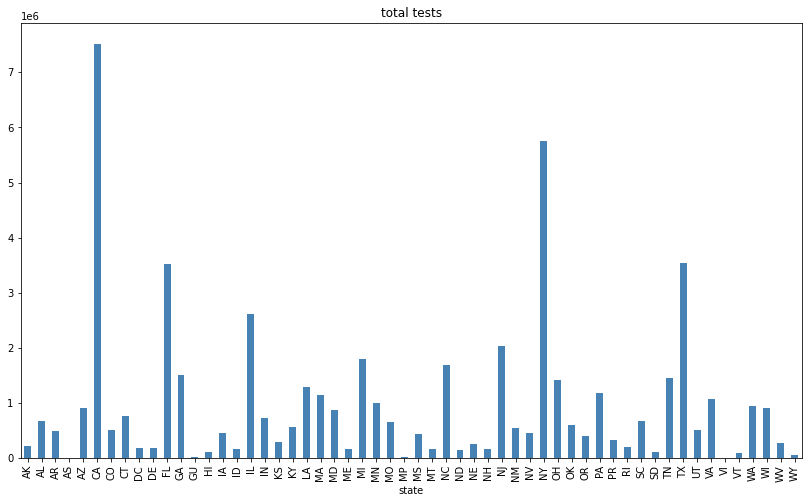

In [134]:
plt.figure(figsize=(14,8)) 
plt.title('total tests') 
stats.groupby("state")['totaltestresults'].max().plot(kind='bar', color='steelblue')

In [164]:
stats=stats[['state','positive','negative','hospitalized', 'death', 'date']]
stats.drop(stats.index[stats['state'] == 'AS'].tolist())
stats=abbr_to_state(stats)
stats.head()

,state,positive,negative,hospitalized,death,date
0,Alaska,3442.0,220222.0,0.0,22.0,2020-07-29
1,Alabama,83782.0,584493.0,9893.0,1538.0,2020-07-29
2,Arkansas,40968.0,454637.0,2747.0,434.0,2020-07-29
3,AS,0.0,1037.0,0.0,0.0,2020-07-29
4,Arizona,168273.0,733156.0,10060.0,3454.0,2020-07-29


In [ ]:
def drop_covid_stats(df):
    return df.drop(['state','positive','negative','hospitalized', 'death', 'date'], axis=1)

In [165]:
stats.describe()

,positive,negative,hospitalized,death
count,8193.000000,8.193000e+03,8193.000000,8193.000000
mean,28406.261443,2.699519e+05,2739.450262,1288.371781
std,59672.351669,5.859275e+05,10204.796022,3192.438309
min,0.000000,0.000000e+00,0.000000,0.000000
25%,639.000000,1.068100e+04,0.000000,13.000000
50%,6364.000000,7.601500e+04,55.000000,177.000000
75%,29096.000000,2.792410e+05,1568.000000,995.000000
max,475305.000000,7.042161e+06,89995.000000,25132.000000


In [166]:
stats.corr().style.background_gradient(cmap='plasma')

,positive,negative,hospitalized,death
positive,1.000000,0.872204,0.742532,0.876305
negative,0.872204,1.000000,0.496224,0.674462
hospitalized,0.742532,0.496224,1.000000,0.853289
death,0.876305,0.674462,0.853289,1.000000


### Lets merge those dataframes in one, thus simplifying the analysis 

In [167]:
a=pd.merge(USA, stats, how ='inner', on =('state', 'date'))
a

,date,state,cases,deaths,positive,negative,hospitalized,death
0,2020-01-22,Washington,1,0.0,2.0,0.0,0.0,0.0
1,2020-01-23,Washington,1,0.0,2.0,0.0,0.0,0.0
2,2020-01-24,Washington,1,0.0,2.0,0.0,0.0,0.0
3,2020-01-25,Washington,1,0.0,2.0,0.0,0.0,0.0
4,2020-01-26,Washington,1,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
348533,2020-07-29,Wyoming,234,2.0,2628.0,49384.0,165.0,26.0
348534,2020-07-29,Wyoming,318,1.0,2628.0,49384.0,165.0,26.0
348535,2020-07-29,Wyoming,245,1.0,2628.0,49384.0,165.0,26.0
348536,2020-07-29,Wyoming,44,5.0,2628.0,49384.0,165.0,26.0


In [720]:
dfs1=pd.concat([a,rank,chronic], sort=True) 
dfs1.head()

,cases,chronic illness,date,death,deaths,hospitalized,negative,num_deaths,num_uninsured,percent_american_indian_alaska_native,...,percent_excessive_drinking,percent_female,percent_hispanic,percent_native_hawaiian_other_pacific_islander,percent_non_hispanic_white,percent_vaccinated,positive,rate of illness,specific illness,state
0,1.0,NaN,2020-01-22,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Washington
1,1.0,NaN,2020-01-23,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Washington
2,1.0,NaN,2020-01-24,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Washington
3,1.0,NaN,2020-01-25,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Washington
4,1.0,NaN,2020-01-26,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Washington


In [275]:
b=pd.concat([dfs1, vuln], sort=False) 
c=pd.concat([b, census], sort=False)
c=c.fillna(0)
c.head()
c.columns

Index(['cases', 'chronic illness', 'date', 'death', 'deaths', 'hospitalized',
       'negative', 'num_deaths', 'num_uninsured',
       'percent_american_indian_alaska_native', 'percent_asian',
       'percent_black', 'percent_excessive_drinking', 'percent_female',
       'percent_hispanic', 'percent_native_hawaiian_other_pacific_islander',
       'percent_non_hispanic_white', 'percent_vaccinated', 'positive',
       'rate of illness', 'specific illness', 'state', 'est population',
       'est. poverty', 'unemployed', 'over 65', 'under 17', 'disabled',
       'minority', 'high bp prev', 'stroke prev', 'obesity_crudeprev',
       'diabetes prev', 'arthritis prev', 'cancer prev', 'asthma prev',
       'copd prev', 'smoking prev', 'highChol prev', 'kidney prev'],
      dtype='object')

In [721]:
def agg_dataframe(df, by):
    d=c.groupby(
       by, as_index = False
    ).agg(
        {
             'hospitalized':max,    # max values 
             'cases':max,
             'deaths': max,
             'num_uninsured':max, 
             'percent_vaccinated': max, 
             'num_uninsured': max,
             'percent_american_indian_alaska_native':max,        
             'percent_asian':max,
             'percent_black':max,        
            'percent_excessive_drinking':max,
            'percent_female':max,
            'percent_hispanic':max,
            'percent_native_hawaiian_other_pacific_islander':max,
            'percent_non_hispanic_white':max,
            'est. poverty':max,
            'over 65':max,
            'under 17':max,
            'disabled':max,
            'high bp prev':max,
            'stroke prev':max,
            'obesity_crudeprev':max,
            'diabetes prev':max,
            'arthritis prev':max,
            'cancer prev':max,
            'asthma prev':max,
            'copd prev':max,
            'smoking prev':max,
            'highChol prev':max,
            'kidney prev':max,
            'rate of illness':max

        }
    )
    return d
d = agg_dataframe(c, ['date', 'state'])
d

,date,state,hospitalized,cases,deaths,num_uninsured,percent_vaccinated,percent_american_indian_alaska_native,percent_asian,percent_black,...,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev,rate of illness
0,0,Alabama,0.0,0.0,0.0,438049.0,49.0,7.858102,4.194192,80.047725,...,54.4,33.1,47.5,12.7,17.0,17.6,35.9,46.2,8.4,57366.0
1,0,Alaska,0.0,0.0,0.0,94727.0,43.0,92.231723,43.357041,10.412518,...,42.9,11.6,24.9,8.3,10.6,6.8,28.7,36.2,3.4,3293.0
2,0,Arizona,0.0,0.0,0.0,685974.0,47.0,74.949177,4.597735,5.466144,...,46.1,20.7,49.7,18.8,13.1,16.5,30.9,52.1,8.0,143386.0
3,0,Arkansas,0.0,0.0,0.0,226179.0,54.0,3.325748,4.736484,61.439902,...,47.0,21.0,36.6,9.7,12.3,11.7,35.1,40.2,5.5,78180.0
4,0,California,0.0,0.0,0.0,2740078.0,50.0,23.887375,38.310616,13.747565,...,49.7,25.5,53.2,22.9,13.7,16.9,36.4,50.5,7.8,701437.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,2020-07-29,Virginia,13000.0,15570.0,519.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6889,2020-07-29,Washington,5474.0,14898.0,667.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6890,2020-07-29,West Virginia,0.0,866.0,20.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6891,2020-07-29,Wisconsin,4539.0,18827.0,429.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [722]:
sub1=d[d.date==0]
sub2=d[d.date!=0]
sub2=sub2[['state', 'cases', 'deaths', 'hospitalized']]
sub2

,state,cases,deaths,hospitalized
58,Washington,1.0,0.0,0.0
59,Washington,1.0,0.0,0.0
60,Washington,1.0,0.0,0.0
61,Washington,1.0,0.0,0.0
62,Washington,1.0,0.0,0.0
...,...,...,...,...
6888,Virginia,15570.0,519.0,13000.0
6889,Washington,14898.0,667.0,5474.0
6890,West Virginia,866.0,20.0,0.0
6891,Wisconsin,18827.0,429.0,4539.0


In [723]:
risks=pd.merge(sub1, sub2, how ='inner', on ='state')
risks=risks.drop(['date', 'hospitalized_x'], axis = 1)
risks['hospitalized'] = risks['hospitalized_y']
risks=risks.drop(['hospitalized_y'], axis = 1)
risks

,state,cases_x,deaths_x,num_uninsured,percent_vaccinated,percent_american_indian_alaska_native,percent_asian,percent_black,percent_excessive_drinking,percent_female,...,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev,rate of illness,cases_y,deaths_y,hospitalized
0,Alabama,0.0,0.0,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,54.536580,...,12.7,17.0,17.6,35.9,46.2,8.4,57366.0,2.0,0.0,0.0
1,Alabama,0.0,0.0,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,54.536580,...,12.7,17.0,17.6,35.9,46.2,8.4,57366.0,6.0,0.0,0.0
2,Alabama,0.0,0.0,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,54.536580,...,12.7,17.0,17.6,35.9,46.2,8.4,57366.0,13.0,0.0,0.0
3,Alabama,0.0,0.0,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,54.536580,...,12.7,17.0,17.6,35.9,46.2,8.4,57366.0,17.0,0.0,0.0
4,Alabama,0.0,0.0,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,54.536580,...,12.7,17.0,17.6,35.9,46.2,8.4,57366.0,21.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6830,Wyoming,0.0,0.0,67560.0,51.0,22.086464,3.611305,2.417758,25.533577,54.313233,...,9.0,10.9,7.0,26.3,33.5,3.1,4216.0,448.0,10.0,158.0
6831,Wyoming,0.0,0.0,67560.0,51.0,22.086464,3.611305,2.417758,25.533577,54.313233,...,9.0,10.9,7.0,26.3,33.5,3.1,4216.0,453.0,10.0,158.0
6832,Wyoming,0.0,0.0,67560.0,51.0,22.086464,3.611305,2.417758,25.533577,54.313233,...,9.0,10.9,7.0,26.3,33.5,3.1,4216.0,455.0,10.0,158.0
6833,Wyoming,0.0,0.0,67560.0,51.0,22.086464,3.611305,2.417758,25.533577,54.313233,...,9.0,10.9,7.0,26.3,33.5,3.1,4216.0,458.0,10.0,162.0


In [724]:
sum_column2 = risks["cases_x"] + risks["cases_y"]
risks["cases"] = sum_column2
sum_column3 = risks["deaths_x"] + risks["deaths_y"]
risks["deaths"] = sum_column3
risks

,state,cases_x,deaths_x,num_uninsured,percent_vaccinated,percent_american_indian_alaska_native,percent_asian,percent_black,percent_excessive_drinking,percent_female,...,copd prev,smoking prev,highChol prev,kidney prev,rate of illness,cases_y,deaths_y,hospitalized,cases,deaths
0,Alabama,0.0,0.0,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,54.536580,...,17.6,35.9,46.2,8.4,57366.0,2.0,0.0,0.0,2.0,0.0
1,Alabama,0.0,0.0,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,54.536580,...,17.6,35.9,46.2,8.4,57366.0,6.0,0.0,0.0,6.0,0.0
2,Alabama,0.0,0.0,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,54.536580,...,17.6,35.9,46.2,8.4,57366.0,13.0,0.0,0.0,13.0,0.0
3,Alabama,0.0,0.0,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,54.536580,...,17.6,35.9,46.2,8.4,57366.0,17.0,0.0,0.0,17.0,0.0
4,Alabama,0.0,0.0,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,54.536580,...,17.6,35.9,46.2,8.4,57366.0,21.0,0.0,0.0,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6830,Wyoming,0.0,0.0,67560.0,51.0,22.086464,3.611305,2.417758,25.533577,54.313233,...,7.0,26.3,33.5,3.1,4216.0,448.0,10.0,158.0,448.0,10.0
6831,Wyoming,0.0,0.0,67560.0,51.0,22.086464,3.611305,2.417758,25.533577,54.313233,...,7.0,26.3,33.5,3.1,4216.0,453.0,10.0,158.0,453.0,10.0
6832,Wyoming,0.0,0.0,67560.0,51.0,22.086464,3.611305,2.417758,25.533577,54.313233,...,7.0,26.3,33.5,3.1,4216.0,455.0,10.0,158.0,455.0,10.0
6833,Wyoming,0.0,0.0,67560.0,51.0,22.086464,3.611305,2.417758,25.533577,54.313233,...,7.0,26.3,33.5,3.1,4216.0,458.0,10.0,162.0,458.0,10.0


In [725]:
sum_column2 = risks["cases_x"] + risks["cases_y"]
risks["cases"] = sum_column2
sum_column3 = risks["deaths_x"] + risks["deaths_y"]
risks["deaths"] = sum_column3
risks=risks.drop(['cases_x','cases_y', 'deaths_x','deaths_y'], axis = 1) 
risks

,state,num_uninsured,percent_vaccinated,percent_american_indian_alaska_native,percent_asian,percent_black,percent_excessive_drinking,percent_female,percent_hispanic,percent_native_hawaiian_other_pacific_islander,...,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev,rate of illness,hospitalized,cases,deaths
0,Alabama,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,54.536580,17.750215,0.749655,...,12.7,17.0,17.6,35.9,46.2,8.4,57366.0,0.0,2.0,0.0
1,Alabama,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,54.536580,17.750215,0.749655,...,12.7,17.0,17.6,35.9,46.2,8.4,57366.0,0.0,6.0,0.0
2,Alabama,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,54.536580,17.750215,0.749655,...,12.7,17.0,17.6,35.9,46.2,8.4,57366.0,0.0,13.0,0.0
3,Alabama,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,54.536580,17.750215,0.749655,...,12.7,17.0,17.6,35.9,46.2,8.4,57366.0,0.0,17.0,0.0
4,Alabama,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,54.536580,17.750215,0.749655,...,12.7,17.0,17.6,35.9,46.2,8.4,57366.0,0.0,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6830,Wyoming,67560.0,51.0,22.086464,3.611305,2.417758,25.533577,54.313233,18.235255,0.157952,...,9.0,10.9,7.0,26.3,33.5,3.1,4216.0,158.0,448.0,10.0
6831,Wyoming,67560.0,51.0,22.086464,3.611305,2.417758,25.533577,54.313233,18.235255,0.157952,...,9.0,10.9,7.0,26.3,33.5,3.1,4216.0,158.0,453.0,10.0
6832,Wyoming,67560.0,51.0,22.086464,3.611305,2.417758,25.533577,54.313233,18.235255,0.157952,...,9.0,10.9,7.0,26.3,33.5,3.1,4216.0,158.0,455.0,10.0
6833,Wyoming,67560.0,51.0,22.086464,3.611305,2.417758,25.533577,54.313233,18.235255,0.157952,...,9.0,10.9,7.0,26.3,33.5,3.1,4216.0,162.0,458.0,10.0


In [1048]:
##removing unneccessary data, bcs we are not interested in rows with deaths count = 0 || cases = 0 || hospitalized = 0
r = agg_dataframe(risks, ['state'])

r = r[r.deaths!=0]
r = r[r.cases!=0]
r = r[r.hospitalized!=0]
r

,state,hospitalized,cases,deaths,num_uninsured,percent_vaccinated,percent_american_indian_alaska_native,percent_asian,percent_black,percent_excessive_drinking,...,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev,rate of illness
0,Alabama,9893.0,10847.0,210.0,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,...,54.4,33.1,47.5,12.7,17.0,17.6,35.9,46.2,8.4,57366.0
1,Alaska,48.0,1653.0,9.0,94727.0,43.0,92.231723,43.357041,10.412518,24.608028,...,42.9,11.6,24.9,8.3,10.6,6.8,28.7,36.2,3.4,3293.0
2,Arizona,10060.0,113148.0,1915.0,685974.0,47.0,74.949177,4.597735,5.466144,18.210424,...,46.1,20.7,49.7,18.8,13.1,16.5,30.9,52.1,8.0,143386.0
3,Arkansas,2747.0,5812.0,75.0,226179.0,54.0,3.325748,4.736484,61.439902,17.894979,...,47.0,21.0,36.6,9.7,12.3,11.7,35.1,40.2,5.5,78180.0
5,Colorado,6319.0,9482.0,411.0,410250.0,58.0,14.056885,6.721816,10.514807,26.609421,...,44.1,19.1,47.3,17.9,13.7,14.2,41.5,50.1,6.0,69674.0
6,Connecticut,13793.0,17733.0,1411.0,182122.0,58.0,1.178856,5.851145,13.239655,19.401189,...,45.6,23.9,35.3,9.6,15.4,14.1,30.9,41.7,6.9,33325.0
10,Florida,25867.0,113142.0,1455.0,2615963.0,50.0,5.187992,6.260279,55.122674,22.406818,...,52.1,30.9,48.6,19.8,14.4,20.4,37.9,51.4,8.9,598844.0
11,Georgia,17964.0,16867.0,381.0,1361978.0,53.0,3.025000,14.503914,70.843316,22.907405,...,53.7,26.5,36.1,12.2,14.5,14.8,38.3,43.3,6.8,222197.0
13,Hawaii,167.0,1516.0,19.0,53025.0,46.0,0.564227,42.952310,2.553669,21.629958,...,46.9,21.1,27.0,10.9,13.1,8.3,30.0,42.6,5.8,24958.0
14,Idaho,783.0,7515.0,53.0,168400.0,49.0,8.486885,3.129242,2.982501,21.025382,...,43.3,13.5,32.6,10.9,11.1,8.4,23.0,39.0,4.1,8933.0


In [727]:
r.describe()

,hospitalized,cases,deaths,num_uninsured,percent_vaccinated,percent_american_indian_alaska_native,percent_asian,percent_black,percent_excessive_drinking,percent_female,...,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev,rate of illness
count,38.000000,38.000000,38.000000,3.800000e+01,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,7608.210526,21307.157895,1032.815789,4.151168e+05,55.210526,23.530032,9.949013,26.333730,21.980700,52.493884,...,46.755263,21.971053,39.060526,13.007895,13.784211,13.492105,33.694737,43.010526,6.163158,96872.868421
std,15115.600386,42379.337294,3699.425119,4.729788e+05,5.136819,31.033090,10.109469,26.381118,3.148555,1.369981,...,7.799990,7.684555,8.874030,3.888054,2.091104,4.789594,7.039539,5.739422,1.933548,122113.934144
min,48.000000,459.000000,9.000000,2.685700e+04,43.000000,0.564227,1.907552,1.506559,16.015151,50.464182,...,27.700000,8.400000,24.900000,7.800000,9.700000,6.700000,19.700000,30.700000,3.000000,3293.000000
25%,789.750000,4307.500000,75.250000,1.150032e+05,53.000000,1.410163,4.526550,5.815753,19.454909,51.589110,...,42.900000,16.375000,33.825000,9.800000,12.225000,8.450000,29.525000,39.525000,5.025000,25459.500000
50%,2894.000000,9752.000000,201.500000,2.755745e+05,55.000000,7.720831,5.578848,12.141102,22.318264,52.066517,...,49.450000,23.100000,37.100000,12.050000,13.700000,13.800000,33.850000,42.300000,6.200000,68163.000000
75%,9566.500000,17516.500000,630.000000,5.326088e+05,59.000000,39.767835,11.430383,40.171529,24.124316,53.303288,...,52.050000,26.575000,47.450000,15.450000,15.400000,16.475000,38.475000,47.850000,7.150000,120855.000000
max,89995.000000,229237.000000,22982.000000,2.615963e+06,66.000000,92.515200,43.357041,85.414352,28.623739,56.870539,...,58.600000,39.500000,58.400000,21.100000,17.800000,23.800000,46.100000,55.400000,12.300000,598844.000000


In [615]:
r.corr().style.background_gradient(cmap='cubehelix')

,hospitalized,cases,deaths,num_uninsured,percent_vaccinated,percent_american_indian_alaska_native,percent_asian,percent_black,percent_excessive_drinking,percent_female,percent_hispanic,percent_native_hawaiian_other_pacific_islander,percent_non_hispanic_white,est. poverty,over 65,under 17,disabled,high bp prev,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
hospitalized,1.000000,0.887372,0.940313,0.537851,-0.032253,-0.203044,0.298694,0.244122,0.068635,0.174405,0.318628,-0.095929,0.064928,0.621700,0.491212,0.510891,0.466594,0.484054,0.732313,0.266962,0.564232,0.303220,0.337377,0.403622,0.526201,0.311815,0.483854,0.707905
cases,0.887372,1.000000,0.868761,0.600711,-0.118862,-0.048576,0.177810,0.108164,0.030659,0.021521,0.455007,-0.090968,0.008669,0.854681,0.742805,0.759123,0.721435,0.468508,0.670434,0.199969,0.473201,0.387584,0.501346,0.295697,0.531615,0.233887,0.581223,0.689404
deaths,0.940313,0.868761,1.000000,0.304164,-0.010743,-0.110527,0.286077,0.045839,0.132925,0.035982,0.252103,-0.056863,0.057996,0.571274,0.400121,0.442974,0.411779,0.345441,0.608735,0.118578,0.426222,0.232044,0.298309,0.279092,0.422600,0.203408,0.413795,0.591826
num_uninsured,0.537851,0.600711,0.304164,1.000000,-0.090956,-0.246898,0.050090,0.485832,-0.048993,0.320024,0.431834,-0.132618,0.046762,0.681246,0.638523,0.579278,0.595440,0.598327,0.656252,0.433734,0.571469,0.460401,0.521308,0.414845,0.606958,0.474410,0.574431,0.622602
percent_vaccinated,-0.032253,-0.118862,-0.010743,-0.090956,1.000000,0.007402,-0.320340,0.026891,0.242096,-0.135019,-0.153492,-0.296598,0.505092,-0.125924,-0.219601,-0.165861,-0.152197,0.107135,0.144079,0.174611,0.124701,0.143255,0.117375,0.229786,0.113985,0.232626,0.042459,0.073728
percent_american_indian_alaska_native,-0.203044,-0.048576,-0.110527,-0.246898,0.007402,1.000000,0.029113,-0.392586,0.220178,-0.448286,0.115788,-0.103037,-0.039987,-0.042448,-0.053568,0.014599,-0.045951,-0.415372,-0.406750,-0.351813,-0.471821,-0.218603,0.004621,-0.573876,-0.483157,-0.374344,-0.246436,-0.348628
percent_asian,0.298694,0.177810,0.286077,0.050090,-0.320340,0.029113,1.000000,-0.011607,0.144513,0.013027,0.046541,0.565973,-0.568677,0.074439,0.139311,0.135210,0.082255,-0.026532,0.094270,0.125826,0.082086,-0.194767,-0.060302,0.014485,-0.045558,0.039076,-0.010551,0.126266
percent_black,0.244122,0.108164,0.045839,0.485832,0.026891,-0.392586,-0.011607,1.000000,-0.254636,0.683620,-0.044581,-0.149404,0.174744,0.130513,0.082862,0.072307,0.080874,0.639497,0.561579,0.610893,0.634547,0.277588,0.137484,0.571654,0.479418,0.603766,0.294286,0.491147
percent_excessive_drinking,0.068635,0.030659,0.132925,-0.048993,0.242096,0.220178,0.144513,-0.254636,1.000000,-0.173906,-0.026403,-0.033113,0.113766,-0.071427,-0.134692,-0.162012,-0.134283,-0.237453,-0.109542,-0.202248,-0.253531,-0.082583,0.093938,-0.180529,-0.209235,-0.036439,-0.170612,-0.140784
percent_female,0.174405,0.021521,0.035982,0.320024,-0.135019,-0.448286,0.013027,0.683620,-0.173906,1.000000,-0.132277,0.098437,0.009939,0.008048,-0.017965,-0.023320,-0.019165,0.434810,0.350398,0.435048,0.468275,0.128043,-0.007930,0.420929,0.363205,0.471012,0.167749,0.309964


## Making regression model
Because hospitalized and cases columns are highly correlated with deaths count, we will drop them from X set too.

In [965]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import statsmodels.api as sm

df = r.drop([ "state", "hospitalized", "cases"],1)   
X = r.drop(["deaths", "state", "hospitalized", "cases"],1)   
y = r["deaths"]
y.tail()

53    519.0
54    667.0
55     20.0
56    429.0
57     10.0
Name: deaths, dtype: float64

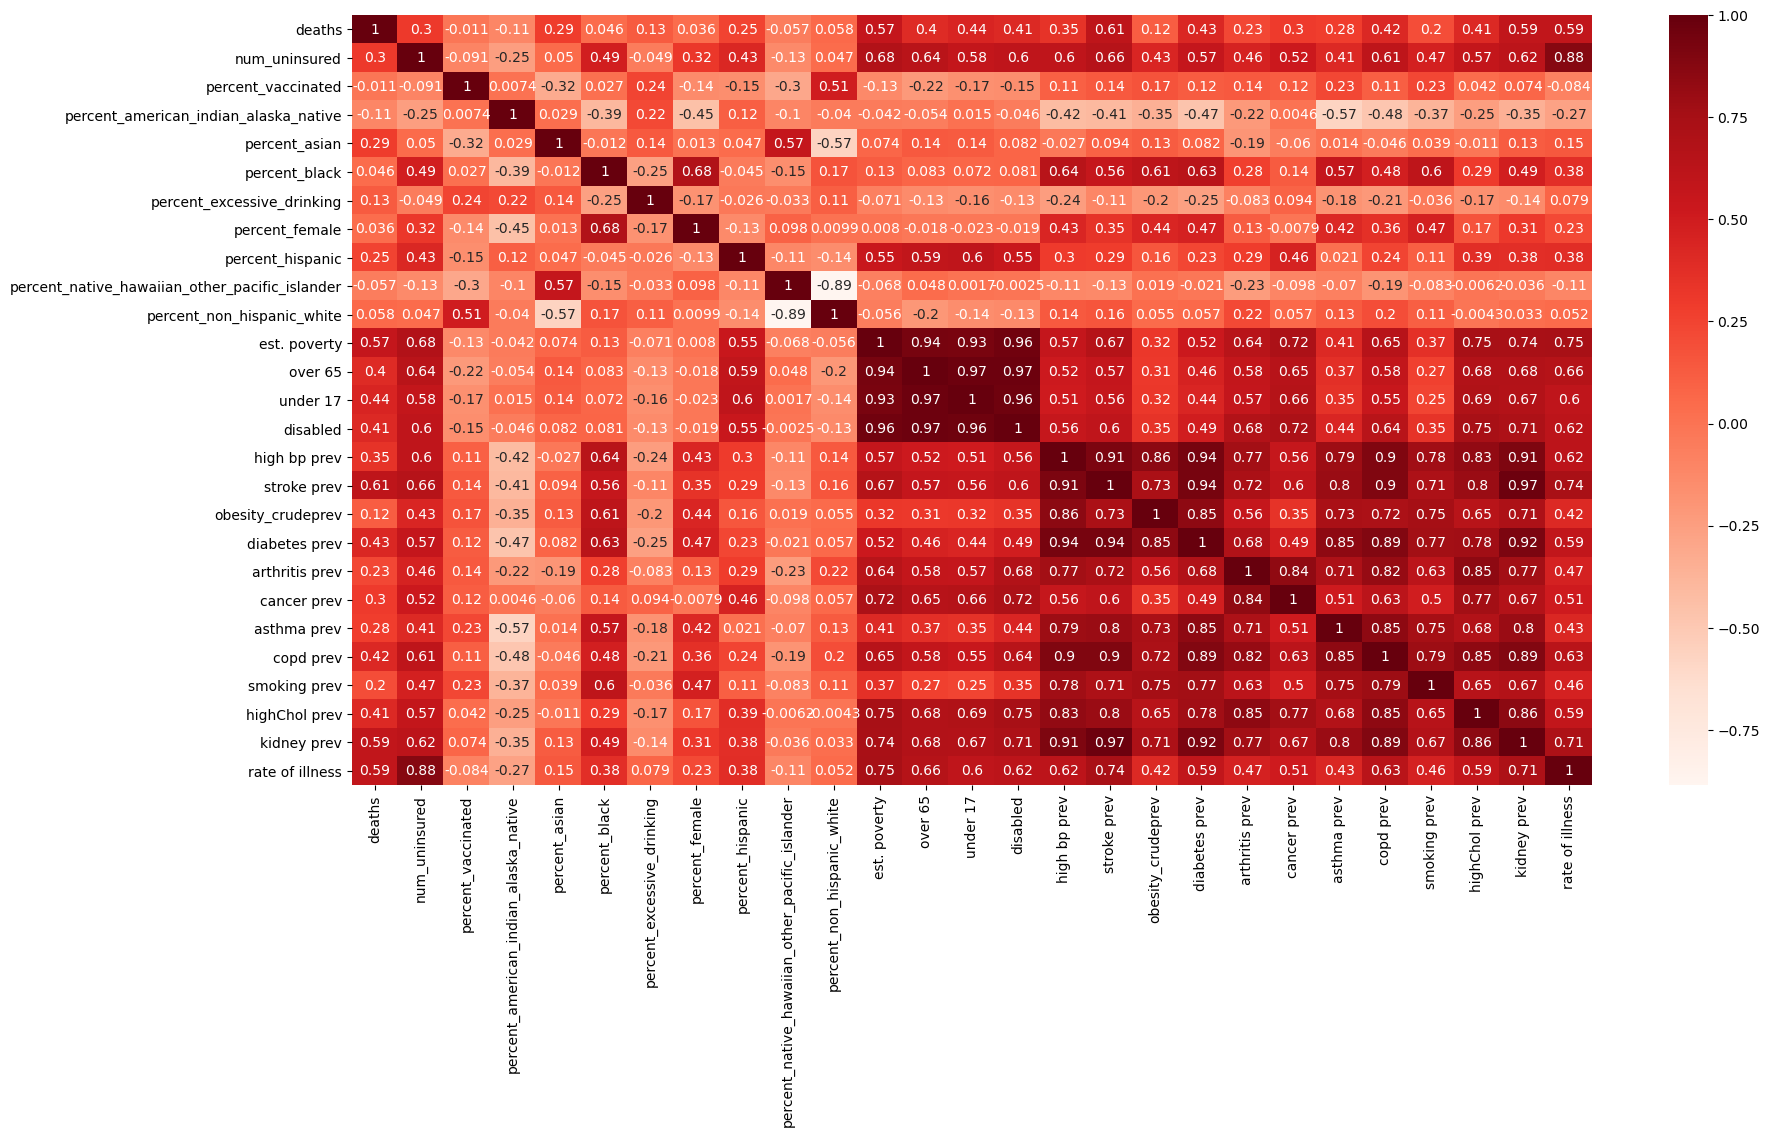

In [864]:
#Lets check Pearson correlation 
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [865]:
#Correlation with output variable
cor_target = abs(cor["deaths"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

deaths             1.000000
est. poverty       0.571274
stroke prev        0.608735
kidney prev        0.591826
rate of illness    0.589399
Name: deaths, dtype: float64

In [867]:
print(df[["stroke prev","est. poverty"]].corr())
print(df[["est. poverty","kidney prev"]].corr())
print(df[["kidney prev","rate of illness"]].corr())

#because relevant feautres are correlative we should use one of them

              stroke prev  est. poverty
stroke prev       1.00000       0.66803
est. poverty      0.66803       1.00000
              est. poverty  kidney prev
est. poverty      1.000000     0.737489
kidney prev       0.737489     1.000000
                 kidney prev  rate of illness
kidney prev         1.000000         0.706043
rate of illness     0.706043         1.000000


In [962]:
##Lets scale data and use robust to get rid of outliners 
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import scale
scaler = StandardScaler()
robust = RobustScaler()


X = scaler.fit_transform(X)
X = robust.fit_transform(X)
y = scale(y)


In [966]:
#Lets find number of optimum features and with using RFE get most impactful variables
nof_list=np.arange(4,6)            
high_score=0
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
    model = LinearRegression()
    rfe = RFE(model,n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, n_features_to_select=nof)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)
indexes = [data.columns[i] for i, x in enumerate(rfe.support_) if x]
data[indexes].head()


Optimum number of features: 4
Score with 4 features: 0.044335
[False False False False False False False False False False False False
 False False  True  True False False False False  True False False False
  True False]
[23 11 16  9 13 17 12 15 14  8 19 20 21 18  1  1  4 10  6  2  1  7  5  3
  1 22]


,stroke prev,obesity_crudeprev,copd prev,rate of illness
3,7.3,47.0,11.7,78180.0
5,7.3,44.1,14.2,69674.0
6,8.2,45.6,14.1,33325.0
10,13.6,52.1,20.4,598844.0
11,9.7,53.7,14.8,222197.0


As we could see earlier stroke prev was highly correlated with remain impactful variables, thats why lets check regression results based on decision tree with values based on stroke prev.

In [969]:
#Based on stroke prev 
from sklearn.model_selection import train_test_split
X = r["stroke prev"].values
y = r.deaths.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [970]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
y_pred = regressor.predict(X_test.reshape(-1, 1))
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,94.0,1680.000000
1,787.0,1680.000000
2,169.0,127.000000
3,170.0,53.000000
4,519.0,762.000000
5,1411.0,127.000000
6,246.0,96.000000
7,217.0,53.000000
8,429.0,1915.000000
9,808.0,226.333333


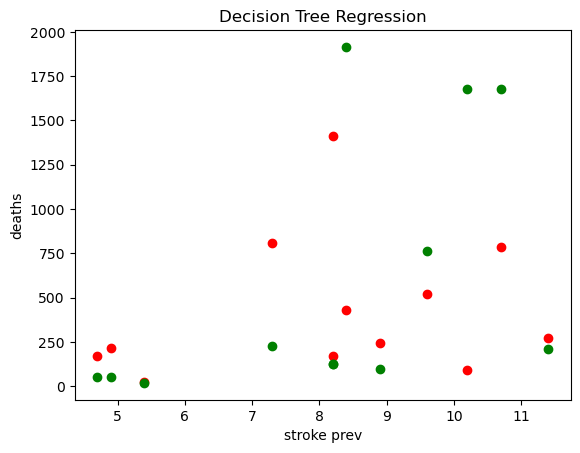

In [971]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, df['Predicted Values'], color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('stroke prev')
plt.ylabel('deaths')
plt.show()

#We can see that the prediction is not that accurate, thats why lets check other train sets based on combinations of other variables

In [972]:
def decision_forest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    regressor = RandomForestRegressor(n_estimators=100)
    regressor.fit(X_train, y_train)
    print(X.shape)
    print(X_train.shape)
    y_pred = regressor.predict(X_train)
    data_tuples = list(zip(list(y_train),list(y_pred)))
    df_final = pd.DataFrame(data_tuples, columns = ['train', 'pred'])
    print(df_final.head())
    X_grid = np.arange(0, df_final.shape[0], 1)
    plt.scatter(X_grid, df_final.pred, color = 'red')
    plt.scatter(X_grid, df_final.train, color = 'green')
    plt.title('Decision Tree Regression')
    plt.ylabel('deaths')
    plt.show()

(38, 17)
(26, 17)
    train     pred
0    20.0   198.96
1   519.0   740.33
2    75.0   150.51
3  1680.0  2258.78
4     9.0    15.17


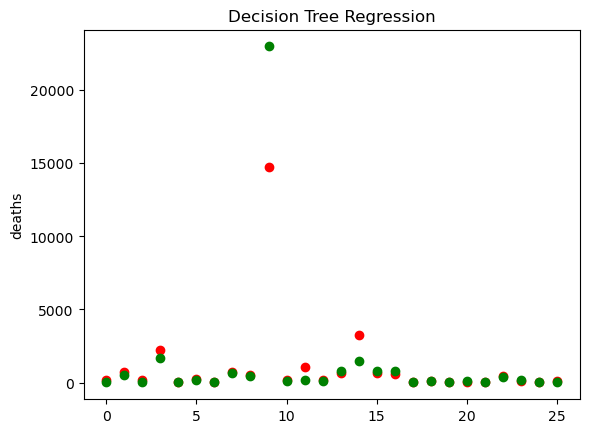

In [974]:
#case without rank variables
X = r.drop(["deaths", "state", "cases"],1)
X = drop_rank(X)
y = r.deaths
decision_forest(X, y)

(38, 23)
(26, 23)
     train      pred
0    762.0    704.39
1     63.0     81.33
2   1455.0   2700.84
3    411.0    429.81
4  22982.0  15653.05


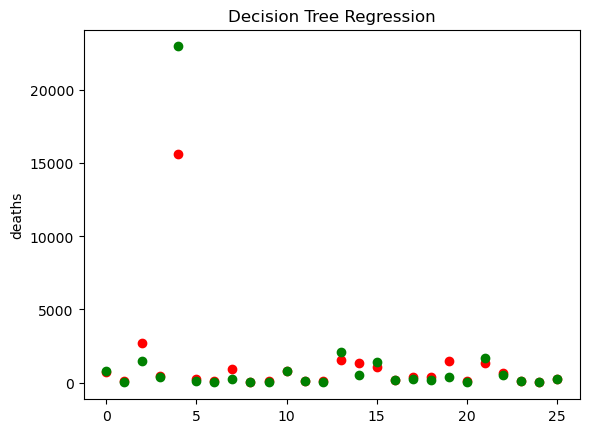

In [976]:
#without vulnerability variables
X = r.drop(["deaths", "state", "cases"],1)
X = drop_vuln(X)
decision_forest(X, y)

(38, 22)
(26, 22)
    train     pred
0    89.0   112.21
1  1680.0  1267.88
2   411.0   442.69
3    39.0   139.89
4   273.0   599.77


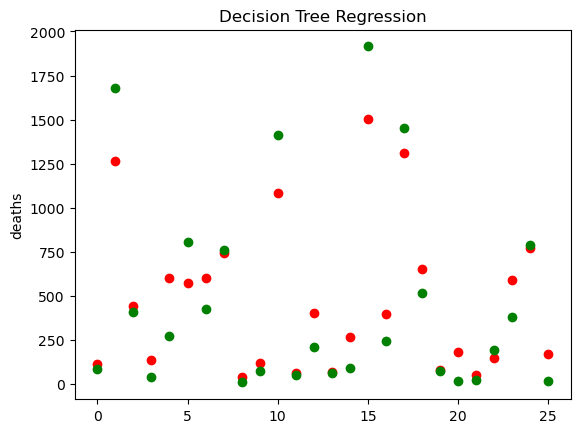

In [977]:
X = drop_census(X)
decision_forest(X, y)

In [ ]:
As we can see from the plots, when census variables are dropped predicted values are less accurate than when vulnerablity and rank variables.
Lets check Lasso and Ridge scores and based on that score make a regression

In [1017]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
X = r.drop(["deaths", "state", "cases"],1)
y = r.deaths
X = scaler.fit_transform(X)
y = scale(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0007, random_state=0, tol=0.01))
ridge = make_pipeline(RobustScaler(), Ridge(alpha =20, random_state=0))

In [997]:
def evaluation(model): 
    result= np.sqrt(-cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error'))
    return(result)

In [1018]:
score = evaluation(lasso)
print("Lasso score: {:.5f}\n".format(score.mean()))

Lasso score: 0.22416



In [1019]:
score = evaluation(ridge)
print("Ridge score: {:.5f} \n".format(score.mean()))

Ridge score: 0.13562 



In [ ]:
Based on the score difference we can notice that ridge score is lower thats why lets use that prediction.

In [1039]:
ridge.fit(X_train, y_train)
test_df_y_log = ridge.predict(X_test)
test_df_y = np.exp(1)**y_test
test_df_y_pred = np.exp(1)**test_df_y_log

df_final = pd.DataFrame({'predicted': list(test_df_y_pred), 'real': list(test_df_y)})
df_final

,predicted,real
0,0.286545,0.757505
1,1.195153,1.273369
2,0.908379,0.836475
3,0.866765,0.798195
4,0.737799,0.769426
5,0.783394,0.757712
6,0.784699,0.780251
7,0.751817,0.766690
8,0.811141,0.773229
9,0.800193,0.764593


As we can see the predicted and real values, which are scaled are close to each other.

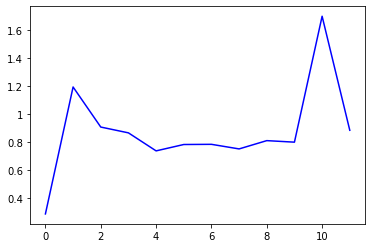

In [1043]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))

plt.plot(X_grid, df_final.predicted, color="blue")
plt.show()


## Conclusion 
As we saw based on regression results and explanatory variables analysis, we can say that as it may be obvious deaths are highly correlated with hospitalized and cases counts, besides that it is correlated with stroke count and povetry level. We analyzed explanatory variables and because the result showed that there are 4 variables: **stroke prev	obesity_crudeprev	copd prev	rate of illness**, which are already correlated with each other, was made a regression based on stroke level. Besides, were discussed few cases of regression with different sets of explanatory data and one with all variables. 